In [26]:
your_file = '/home/wissal/Documents/github repos cloned/PED-DQN/pursuit/results/logs/r-sc-battery_endless-h-1-m-20x20-Pp-6x3-a-ped_dqn-tu-5000-mq-4-rb-20000-mb-32-lr-0.0001-seed-1-0508130032.txt'
import tensorflow as tf
import torch
# Parse the data from the text file and extract episodes and rewards
episodes = []
rewards = []

with open(your_file, 'r') as file:
    for line in file:
        parts = line.strip().split('\t')
        if len(parts) >= 4:
            if parts[2] == 'steps':
                episodes.append(int(parts[1]))
            elif parts[2] == 'b_rwd':
                reward_values = list(map(float, parts[3:]))
                rewards.append(reward_values)

device = "GPU" if tf.config.list_physical_devices('GPU') else "CPU"
print("TensorFlow device:", device)

# Write summaries using SummaryWriter
log_dir = 'logs'  # Directory to store the event files
with tf.summary.create_file_writer(log_dir).as_default():
    for episode, reward in zip(episodes, rewards):
        tf.summary.scalar('b_rwd', reward[0], step=episode)

import matplotlib.pyplot as plt

plt.figure(facecolor='white')

plt.plot(episodes, [reward[0] for reward in rewards], label='Reward')
plt.xlabel('Episodes')
plt.ylabel('Reward (b_rwd)')
plt.title('Episodes vs Reward')
plt.legend()
plt.grid(False)
plt.show()

Exception ignored in: <bound method IPythonKernel._clean_thread_parent_frames of <ipykernel.ipkernel.IPythonKernel object at 0x7f07021807f0>>
Traceback (most recent call last):
  File "/home/wissal/anaconda3/envs/my_env/lib/python3.8/site-packages/ipykernel/ipkernel.py", line 770, in _clean_thread_parent_frames
    def _clean_thread_parent_frames(
KeyboardInterrupt: 


FileNotFoundError: [Errno 2] No such file or directory: '/home/wissal/Documents/github repos cloned/PED-DQN/pursuit/results/logs/r-sc-battery_endless-h-1-m-20x20-Pp-6x3-a-ped_dqn-tu-5000-mq-4-rb-20000-mb-32-lr-0.0001-seed-1-0508130032.txt'

In [103]:
import tensorflow
print(tensorflow.__version__)
print(tf.config.list_physical_devices('GPU'))

2.11.1
[]


In [107]:
import pandas as pd
import tensorflow as tf
import numpy as np

# Define the path to your log file
log_file = '/home/wissal/Documents/github repos cloned/PED_DQN/PED-DQN 3333/pursuit/results/logs/r-sc-battery_endless-h-1-m-20x20-Pp-9x8-a-ind_dqn-tu-5000-mq-4-rb-20000-mb-32-lr-0.0001-seed-1-0519163454.txt'

# Read the data from the file
data = pd.read_csv(log_file, delimiter="\t", header=None, names=["timestamp", "episode", "metric", *range(9)])

# Group the data by episode
grouped_data = data.groupby("episode")

# Create a summary writer
log_dir = 'logs'
summary_writer = tf.summary.create_file_writer(log_dir)

# Define a function to create summary logs
def create_summary(writer, tag, value, step):
    with writer.as_default():
        tf.summary.scalar(name=tag, data=value, step=step)
        writer.flush()

# Iterate through the grouped data and log metrics to TensorBoard
for episode, group in grouped_data:
    for metric in group["metric"].unique():
        metric_data = group[group["metric"] == metric]
        #print(metric_data)
        values = metric_data.iloc[:, 3:12].values.flatten().astype(float)
        mean_value = np.mean(values)
        
        create_summary(summary_writer, metric + '/mean', mean_value, episode)

        for i, value in enumerate(values):
            create_summary(summary_writer, metric + f'/value_{i}', value, episode)

print(f"Logs written to {log_dir}. Use `tensorboard --logdir={log_dir}` to visualize.")

Logs written to logs. Use `tensorboard --logdir=logs` to visualize.


In [3]:
!pip install matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 1.3 MB/s eta 0:00:001.6 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.2/9.2 MB 6.8 MB/s eta 0:00:00m eta 0:00:010:01:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.1/301.1 kB 5.5 MB/s eta 0:00:000:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 5.2 MB/s eta 0:00:000:00:01m eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 6.3 MB/s eta 0:00:00m eta 0:00:010:01:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 6.6 MB/s eta 0:00:00m eta 0:00:010:01:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.2/103.2 kB 3.5 MB/s eta 0:00:00


In [5]:
!pip install scipy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.9/58.9 kB 634.5 kB/s eta 0:00:001m837.5 kB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.5/34.5 MB 5.7 MB/s eta 0:00:00m eta 0:00:010:00:01


In [20]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

log_file_5000 = '/home/sat-swarm/Documents/priority-intrinsic-/results/logs/r-sc-battery_endless-h-1-m-12x12-Pp-20x19-a-ped_dqn-tu-5000-mq-4-rb-20000-mb-32-lr-0.0001-seed-1-0621234216.txt'
log_file_6000 = '/home/sat-swarm/Documents/PED333/PED33/results/logs/r-sc-battery_endless-h-1-m-12x12-Pp-20x19-a-ped_dqn-tu-5000-mq-4-rb-20000-mb-32-lr-0.0001-seed-1-0831222217.txt'

#seed 4 reputation
log_file_111 = '/home/sat-swarm/Documents/priority-intrinsic-/results/logs/r-sc-battery_endless-h-1-m-12x12-Pp-20x19-a-ped_dqn-tu-5000-mq-4-rb-20000-mb-32-lr-0.0001-seed-4-0731090350.txt' 

#seed 2 original
log_file_700000 = '/home/sat-swarm/Documents/priority-intrinsic-/results/logs/r-sc-battery_endless-h-1-m-12x12-Pp-20x19-a-ped_dqn-tu-5000-mq-4-rb-20000-mb-32-lr-0.0001-seed-2-0630171039.txt'


#seed 3 original
log_file_7000000 = '/home/sat-swarm/Documents/priority-intrinsic-/results/logs/r-sc-battery_endless-h-1-m-12x12-Pp-20x19-a-ped_dqn-tu-5000-mq-4-rb-20000-mb-32-lr-0.0001-seed-3-0702134029.txt'

#seed 4 original
log_file_777 = '/home/sat-swarm/Documents/priority-intrinsic-/results/logs/r-sc-battery_endless-h-1-m-12x12-Pp-20x19-a-ped_dqn-tu-5000-mq-4-rb-20000-mb-32-lr-0.0001-seed-4-0707023135.txt'


#seed 5 original
log_file_2 = '/home/sat-swarm/Documents/priority-intrinsic-/results/logs/r-sc-battery_endless-h-1-m-12x12-Pp-20x19-a-ped_dqn-tu-5000-mq-4-rb-20000-mb-32-lr-0.0001-seed-5-0816123818.txt'


log_file_11 = '/home/sat-swarm/Documents/priority-intrinsic-/results/logs/r-sc-battery_endless-h-1-m-12x12-Pp-20x19-a-ped_dqn-tu-5000-mq-4-rb-20000-mb-32-lr-0.0001-seed-4-0807175509.txt'

#reputation seed 2 
log_file_110 = '/home/sat-swarm/Documents/priority-intrinsic-/results/logs/r-sc-battery_endless-h-1-m-12x12-Pp-20x19-a-ped_dqn-tu-5000-mq-4-rb-20000-mb-32-lr-0.0001-seed-2-0811125536.txt'

#reputation seed 3
log_file_1100 = '/home/sat-swarm/Documents/priority-intrinsic-/results/logs/r-sc-battery_endless-h-1-m-12x12-Pp-20x19-a-ped_dqn-tu-5000-mq-4-rb-20000-mb-32-lr-0.0001-seed-3-0809172613.txt'

#reputation seed 5
log_file_22 = '/home/sat-swarm/Documents/priority-intrinsic-/results/logs/r-sc-battery_endless-h-1-m-12x12-Pp-20x19-a-ped_dqn-tu-5000-mq-4-rb-20000-mb-32-lr-0.0001-seed-5-0814000342.txt'

def parse_log_file(file_path):
    episodes = []
    rewards = []
    preys_captured = []
    td_errors = []
    RX = []

    with open(file_path, 'r') as file:
        for line in file:
            parts = line.strip().split('\t')
            if len(parts) >= 4:
                if parts[2] == 'steps':
                    episodes.append(int(parts[1]))
                elif parts[2] == 'b_rwd':
                    reward_values = list(map(float, parts[3:]))
                    rewards.append(np.mean(reward_values))  # Compute mean reward
                elif parts[2] == 'captr':
                    preys_values = list(map(float, parts[3:]))
                    preys_captured.append(np.mean(preys_values))  # Compute mean preys captured
                elif parts[2] == 'td_er':
                    td_error_values = list(map(float, parts[3:]))
                    td_errors.append(np.mean(td_error_values))  # Compute mean TD error
                elif parts[2] == 'RX':
                    rx_list = list(map(float, parts[3:]))
                    RX.append(np.mean(rx_list))  # Compute mean TD error

    return episodes, rewards, preys_captured, td_errors, RX

from scipy.ndimage import uniform_filter1d

def moving_average(data, window_size=5):
    return uniform_filter1d(data, size=window_size)

episodes_5000, rewards_5000, preys_5000, td_errors_5000, RX_5000 = parse_log_file(log_file_5000)
episodes_6000, rewards_6000, preys_6000, td_errors_6000, RX_6000 = parse_log_file(log_file_6000)
episodes_700000, rewards_700000, preys_700000, td_errors_700000, RX_700000 = parse_log_file(log_file_700000)
episodes_7000000, rewards_7000000, preys_7000000, td_errors_7000000, RX_7000000 = parse_log_file(log_file_7000000)
episodes_777, rewards_777, preys_777, td_errors_777, RX_777 = parse_log_file(log_file_777)
episodes_111, rewards_111, preys_111, td_errors_111, RX_111 = parse_log_file(log_file_111)
episodes_2, rewards_2, preys_2, td_errors_2, RX_2 = parse_log_file(log_file_2)
episodes_22, rewards_22, preys_22, td_errors_22, RX_22 = parse_log_file(log_file_22)


episodes_11, rewards_11, preys_11, td_errors_11, RX_11 = parse_log_file(log_file_11)
episodes_110, rewards_110, preys_110, td_errors_110, RX_110 = parse_log_file(log_file_110)
episodes_1100, rewards_1100, preys_1100, td_errors_1100, RX_1100 = parse_log_file(log_file_1100)

moving_avg_rewards_5000 = moving_average(rewards_5000)
moving_avg_rewards_6000 = moving_average(rewards_6000)
moving_avg_rewards_7000000 = moving_average(rewards_7000000)
moving_avg_rewards_777 = moving_average(rewards_777)
moving_avg_rewards_111 = moving_average(rewards_111)
moving_avg_rewards_111 = moving_average(rewards_111)
moving_avg_rewards_110 = moving_average(rewards_110)
moving_avg_rewards_1100 = moving_average(rewards_1100)
moving_avg_rewards_2 = moving_average(rewards_2)
moving_avg_rewards_22 = moving_average(rewards_22)

moving_avg_rewards_700000 = moving_average(rewards_700000)

moving_avg_rewards_11 = moving_average(rewards_11)

moving_avg_preys_5000 = moving_average(preys_5000)
moving_avg_preys_6000 = moving_average(preys_6000)
moving_avg_preys_777 = moving_average(preys_777)
moving_avg_preys_111 = moving_average(preys_111)
moving_avg_preys_11 = moving_average(preys_11)
moving_avg_preys_110 = moving_average(preys_110)
moving_avg_preys_1100 = moving_average(preys_1100)
moving_avg_preys_2 = moving_average(preys_2)
moving_avg_preys_22 = moving_average(preys_22)

moving_avg_preys_7000000 = moving_average(preys_7000000)
moving_avg_preys_700000 = moving_average(preys_700000)

moving_avg_td_errors_5000 = moving_average(td_errors_5000)
moving_avg_td_errors_6000 = moving_average(td_errors_6000)
moving_avg_td_errors_7000000 = moving_average(td_errors_7000000)
moving_avg_td_errors_777 = moving_average(td_errors_777)
moving_avg_td_errors_111 = moving_average(td_errors_111)
moving_avg_td_errors_11 = moving_average(td_errors_11)
moving_avg_td_errors_110 = moving_average(td_errors_110)
moving_avg_td_errors_1100 = moving_average(td_errors_1100)
moving_avg_td_errors_2 = moving_average(td_errors_2)
moving_avg_td_errors_22 = moving_average(td_errors_22)


moving_avg_td_errors_700000 = moving_average(td_errors_700000)


# Ensure TensorFlow uses the correct device
device = "GPU" if tf.config.list_physical_devices('GPU') else "CPU"
print("TensorFlow device:", device)

# Plot the rewards, preys captured, and TD errors from all files
plt.figure(facecolor='white', figsize=(12, 20))

plt.subplot(4, 1, 1)
plt.plot(episodes_6000, moving_avg_rewards_6000, label='PED DQN seed = 1')
plt.plot(episodes_700000, moving_avg_rewards_700000, label='PED DQN seed = 2')
plt.plot(episodes_7000000, moving_avg_rewards_7000000, label='PED DQN seed = 3')
plt.plot(episodes_777, moving_avg_rewards_777, label='PED DQN seed = 4')
plt.plot(episodes_2, moving_avg_rewards_2, label='PED DQN seed = 5')

plt.plot(episodes_5000, moving_avg_rewards_5000, label='Filtered RR seed = 1')
plt.plot(episodes_110, moving_avg_rewards_110, label='Filtered RR seed = 2')
plt.plot(episodes_1100, moving_avg_rewards_1100, label='Filtered RR seed = 3')
plt.plot(episodes_11, moving_avg_rewards_11, label='Filtered RR seed = 4')

plt.plot(episodes_22, moving_avg_rewards_22, label='Filtered RR seed = 5')

plt.xlabel('Episodes')
plt.ylabel('Moving avg Mean Reward (b_rwd)')
plt.title('Episodes vs Moving avg Mean Reward')
plt.legend()
plt.grid(False)

plt.subplot(4, 1, 2)
plt.plot(episodes_6000, rewards_6000, label='PED DQN seed = 1')

plt.plot(episodes_700000, rewards_700000, label='PED DQN seed = 2')
plt.plot(episodes_7000000, rewards_7000000, label='PED DQN seed = 3')
plt.plot(episodes_777, rewards_777, label='PED DQN seed = 4')
plt.plot(episodes_2, rewards_2, label='PED DQN seed = 5')

plt.plot(episodes_5000, rewards_5000, label='Filtered RR seed = 1')

plt.plot(episodes_110, rewards_110, label='Filtered RR seed = 2')
plt.plot(episodes_1100, rewards_1100, label='Filtered RR seed = 3')
plt.plot(episodes_11, rewards_11, label='Filtered RR seed = 4')
plt.plot(episodes_22, rewards_22, label='Filtered RR seed = 5')

plt.xlabel('Episodes')
plt.ylabel('Mean Reward (b_rwd)')
plt.title('Episodes vs Mean Reward')
plt.legend()
plt.grid(False)


plt.subplot(4, 1, 3)
plt.plot(episodes_6000, moving_avg_preys_6000, label='PED DQN seed=1')
plt.plot(episodes_700000, moving_avg_preys_700000, label='PED DQN seed = 2')
plt.plot(episodes_7000000, moving_avg_preys_7000000, label='PED DQN seed = 3')
plt.plot(episodes_777, moving_avg_preys_777, label='PED DQN seed = 4')
plt.plot(episodes_2, moving_avg_preys_2, label='PED DQN seed = 5')

plt.plot(episodes_5000, moving_avg_preys_5000, label='Filtered RR seed = 1')

plt.plot(episodes_110, moving_avg_preys_110, label='Filtered RR seed = 2')
plt.plot(episodes_1100, moving_avg_preys_1100, label='Filtered RR seed = 3')
plt.plot(episodes_11, moving_avg_preys_11, label='Filtered RR seed = 4')
plt.plot(episodes_22, moving_avg_preys_22, label='Filtered RR seed = 5')


plt.xlabel('Episodes')
plt.ylabel('Moving avg Mean Preys Captured (captr)')
plt.title('Episodes vs Moving avg Preys Captured')
plt.legend() 
plt.grid(False)


plt.subplot(4, 1, 4)
plt.plot(episodes_6000, moving_avg_td_errors_6000, label='PED DQN seed=1')
plt.plot(episodes_700000, moving_avg_td_errors_700000, label='PED DQN seed = 2')
plt.plot(episodes_7000000, moving_avg_td_errors_7000000, label='PED DQN seed = 3')
plt.plot(episodes_777, moving_avg_td_errors_777, label='PED DQN seed = 4')
plt.plot(episodes_2, moving_avg_td_errors_2, label='PED DQN seed = 5')

plt.plot(episodes_5000, moving_avg_td_errors_5000, label='Filtered RR seed = 1')

plt.plot(episodes_110, moving_avg_td_errors_110, label='Filtered RR seed = 2')
plt.plot(episodes_1100, moving_avg_td_errors_1100, label='Filtered RR seed = 3')
plt.plot(episodes_11, moving_avg_td_errors_11, label='Filtered RR seed = 4')
plt.plot(episodes_22, moving_avg_td_errors_22, label='Filtered RR seed = 5')



plt.xlabel('Episodes')
plt.ylabel('Moving avg Mean TD Error (td_er)')
plt.title('Episodes vs Moving avg TD Error')
plt.legend()


plt.grid(False)



plt.tight_layout()
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: '/home/sat-swarm/Documents/priority-intrinsic-/results/logs/r-sc-battery_endless-h-1-m-12x12-Pp-20x19-a-ped_dqn-tu-5000-mq-4-rb-20000-mb-32-lr-0.0001-seed-1-0621234216.txt'

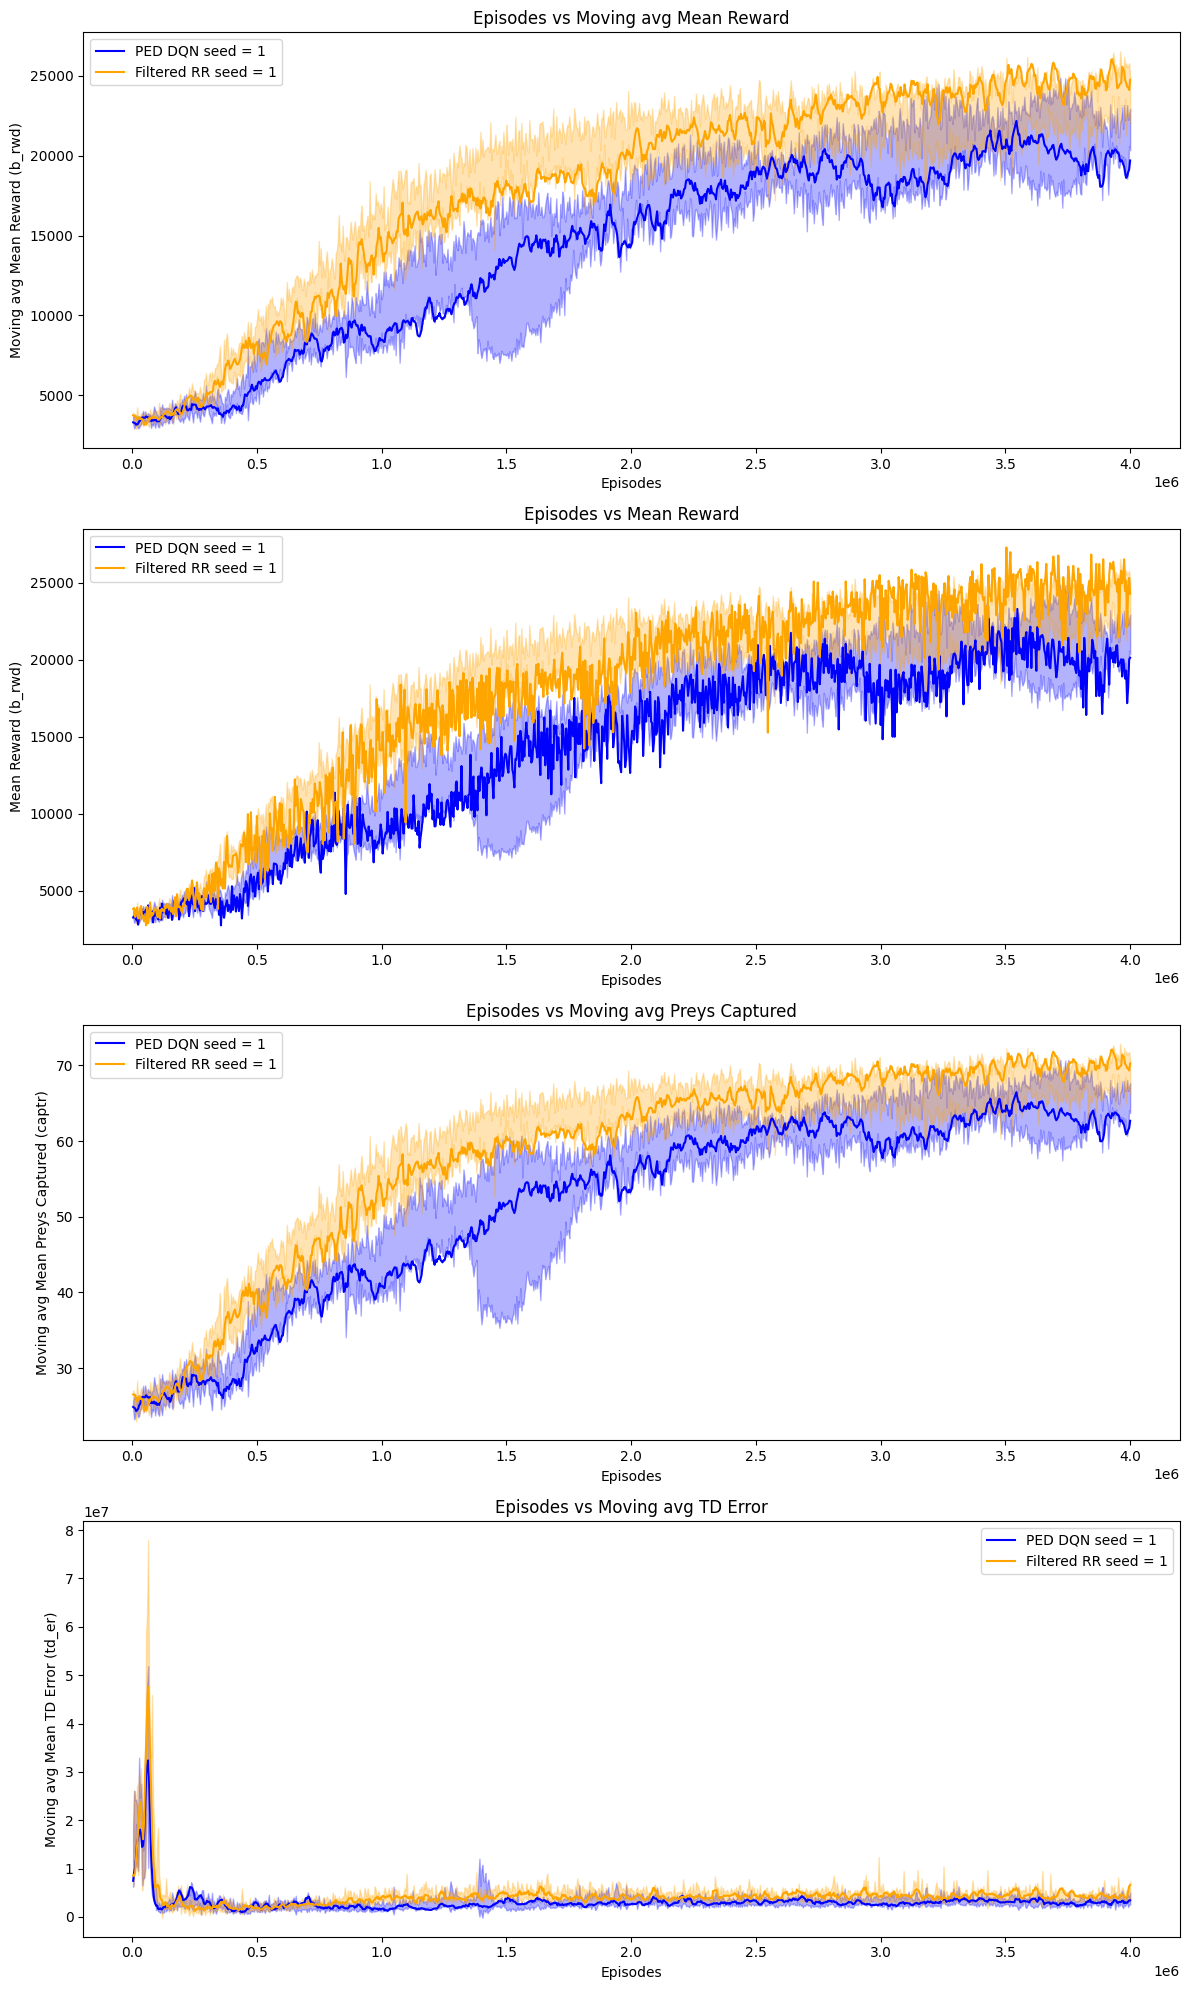

In [73]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

# Function to calculate mean and standard deviation
def calculate_mean_and_std(log_files):
    all_rewards = []
    all_preys = []
    all_td_errors = []
    all_RX = []
    
    for file in log_files:
        _, rewards, preys, td_errors, RX = parse_log_file(file)
        all_rewards.append(rewards)
        all_preys.append(preys)
        all_td_errors.append(td_errors)
        all_RX.append(RX)
    
    # Align the length of lists
    min_length = min(map(len, all_rewards))
    all_rewards = [reward[:min_length] for reward in all_rewards]
    all_preys = [prey[:min_length] for prey in all_preys]
    all_td_errors = [td_error[:min_length] for td_error in all_td_errors]
    all_RX = [rx[:min_length] for rx in all_RX]
    
    mean_rewards = np.mean(all_rewards, axis=0)
    std_rewards = np.std(all_rewards, axis=0)
    
    mean_preys = np.mean(all_preys, axis=0)
    std_preys = np.std(all_preys, axis=0)
    
    mean_td_errors = np.mean(all_td_errors, axis=0)
    std_td_errors = np.std(all_td_errors, axis=0)
    
    mean_RX = np.mean(all_RX, axis=0)
    std_RX = np.std(all_RX, axis=0)
    
    return mean_rewards, std_rewards, mean_preys, std_preys, mean_td_errors, std_td_errors, mean_RX, std_RX

# Define the log files for different seeds
ped_dqn_logs = [log_file_6000, log_file_700000, log_file_7000000, log_file_777, log_file_2]
filtered_rr_logs = [log_file_5000, log_file_110, log_file_1100, log_file_11, log_file_22]

# Calculate mean and standard deviation for PED DQN and Filtered RR
mean_rewards_ped_dqn, std_rewards_ped_dqn, mean_preys_ped_dqn, std_preys_ped_dqn, mean_td_errors_ped_dqn, std_td_errors_ped_dqn, mean_RX_ped_dqn, std_RX_ped_dqn = calculate_mean_and_std(ped_dqn_logs)
mean_rewards_rr, std_rewards_rr, mean_preys_rr, std_preys_rr, mean_td_errors_rr, std_td_errors_rr, mean_RX_rr, std_RX_rr = calculate_mean_and_std(filtered_rr_logs)

# Plot the rewards, preys captured, and TD errors
plt.figure(facecolor='white', figsize=(12, 20))

plt.subplot(4, 1, 1)
plt.plot(episodes_6000, moving_avg_rewards_6000, label='PED DQN seed = 1', color='blue')
plt.fill_between(episodes_6000[:len(mean_rewards_ped_dqn)], mean_rewards_ped_dqn - std_rewards_ped_dqn, mean_rewards_ped_dqn + std_rewards_ped_dqn, color='blue', alpha=0.3)
plt.plot(episodes_5000, moving_avg_rewards_5000, label='Filtered RR seed = 1', color='orange')
plt.fill_between(episodes_5000[:len(mean_rewards_rr)], mean_rewards_rr - std_rewards_rr, mean_rewards_rr + std_rewards_rr, color='orange', alpha=0.3)
plt.xlabel('Episodes')
plt.ylabel('Moving avg Mean Reward (b_rwd)')
plt.title('Episodes vs Moving avg Mean Reward')
plt.legend()
plt.grid(False)

plt.subplot(4, 1, 2)
plt.plot(episodes_6000, rewards_6000, label='PED DQN seed = 1', color='blue')
plt.fill_between(episodes_6000[:len(mean_rewards_ped_dqn)], mean_rewards_ped_dqn - std_rewards_ped_dqn, mean_rewards_ped_dqn + std_rewards_ped_dqn, color='blue', alpha=0.3)
plt.plot(episodes_5000, rewards_5000, label='Filtered RR seed = 1', color='orange')
plt.fill_between(episodes_5000[:len(mean_rewards_rr)], mean_rewards_rr - std_rewards_rr, mean_rewards_rr + std_rewards_rr, color='orange', alpha=0.3)
plt.xlabel('Episodes')
plt.ylabel('Mean Reward (b_rwd)')
plt.title('Episodes vs Mean Reward')
plt.legend()
plt.grid(False)

plt.subplot(4, 1, 3)
plt.plot(episodes_6000, moving_avg_preys_6000, label='PED DQN seed = 1', color='blue')
plt.fill_between(episodes_6000[:len(mean_preys_ped_dqn)], mean_preys_ped_dqn - std_preys_ped_dqn, mean_preys_ped_dqn + std_preys_ped_dqn, color='blue', alpha=0.3)
plt.plot(episodes_5000, moving_avg_preys_5000, label='Filtered RR seed = 1', color='orange')
plt.fill_between(episodes_5000[:len(mean_preys_rr)], mean_preys_rr - std_preys_rr, mean_preys_rr + std_preys_rr, color='orange', alpha=0.3)
plt.xlabel('Episodes')
plt.ylabel('Moving avg Mean Preys Captured (captr)')
plt.title('Episodes vs Moving avg Preys Captured')
plt.legend()
plt.grid(False)

plt.subplot(4, 1, 4)
plt.plot(episodes_6000, moving_avg_td_errors_6000, label='PED DQN seed = 1', color='blue')
plt.fill_between(episodes_6000[:len(mean_td_errors_ped_dqn)], mean_td_errors_ped_dqn - std_td_errors_ped_dqn, mean_td_errors_ped_dqn + std_td_errors_ped_dqn, color='blue', alpha=0.3)
plt.plot(episodes_5000, moving_avg_td_errors_5000, label='Filtered RR seed = 1', color='orange')
plt.fill_between(episodes_5000[:len(mean_td_errors_rr)], mean_td_errors_rr - std_td_errors_rr, mean_td_errors_rr + std_td_errors_rr, color='orange', alpha=0.3)
plt.xlabel('Episodes')
plt.ylabel('Moving avg Mean TD Error (td_er)')
plt.title('Episodes vs Moving avg TD Error')
plt.legend()
plt.grid(False)

plt.tight_layout()
plt.show()


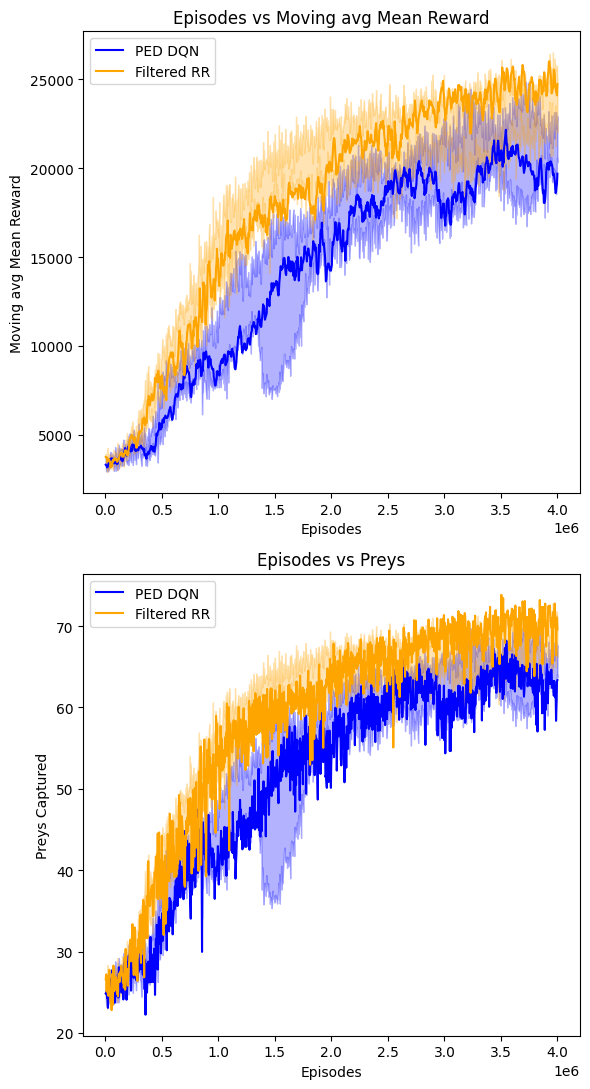

In [4]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

# Function to calculate mean and standard deviation
def calculate_mean_and_std(log_files):
    all_rewards = []
    all_preys = []
    all_td_errors = []
    all_RX = []
    
    for file in log_files:
        _, rewards, preys, td_errors, RX = parse_log_file(file)
        all_rewards.append(rewards)
        all_preys.append(preys)
        all_td_errors.append(td_errors)
        all_RX.append(RX)
    
    # Align the length of lists
    min_length = min(map(len, all_rewards))
    all_rewards = [reward[:min_length] for reward in all_rewards]
    all_preys = [prey[:min_length] for prey in all_preys]
    all_td_errors = [td_error[:min_length] for td_error in all_td_errors]
    all_RX = [rx[:min_length] for rx in all_RX]
    
    mean_rewards = np.mean(all_rewards, axis=0)
    std_rewards = np.std(all_rewards, axis=0)
    
    mean_preys = np.mean(all_preys, axis=0)
    std_preys = np.std(all_preys, axis=0)
    
    mean_td_errors = np.mean(all_td_errors, axis=0)
    std_td_errors = np.std(all_td_errors, axis=0)
    
    mean_RX = np.mean(all_RX, axis=0)
    std_RX = np.std(all_RX, axis=0)
    
    return mean_rewards, std_rewards, mean_preys, std_preys, mean_td_errors, std_td_errors, mean_RX, std_RX

# Define the log files for different seeds
ped_dqn_logs = [log_file_6000, log_file_700000, log_file_7000000, log_file_777, log_file_2]
filtered_rr_logs = [log_file_5000, log_file_110, log_file_1100, log_file_11, log_file_22]

# Calculate mean and standard deviation for PED DQN and Filtered RR
mean_rewards_ped_dqn, std_rewards_ped_dqn, mean_preys_ped_dqn, std_preys_ped_dqn, mean_td_errors_ped_dqn, std_td_errors_ped_dqn, mean_RX_ped_dqn, std_RX_ped_dqn = calculate_mean_and_std(ped_dqn_logs)
mean_rewards_rr, std_rewards_rr, mean_preys_rr, std_preys_rr, mean_td_errors_rr, std_td_errors_rr, mean_RX_rr, std_RX_rr = calculate_mean_and_std(filtered_rr_logs)

# Plot the rewards, preys captured, and TD errors
plt.figure(facecolor='white', figsize=(6, 11))

# Plot the moving average mean rewards
plt.subplot(2, 1, 1)
plt.plot(episodes_6000, moving_avg_rewards_6000, label='PED DQN', color='blue')
plt.fill_between(episodes_6000[:len(mean_rewards_ped_dqn)], mean_rewards_ped_dqn - std_rewards_ped_dqn, mean_rewards_ped_dqn + std_rewards_ped_dqn, color='blue', alpha=0.3)
plt.plot(episodes_5000, moving_avg_rewards_5000, label='Filtered RR', color='orange')
plt.fill_between(episodes_5000[:len(mean_rewards_rr)], mean_rewards_rr - std_rewards_rr, mean_rewards_rr + std_rewards_rr, color='orange', alpha=0.3)
plt.xlabel('Episodes')
plt.ylabel('Moving avg Mean Reward')
plt.title('Episodes vs Moving avg Mean Reward')
plt.legend()
plt.grid(False)

# Plot the actual preys captured
plt.subplot(2, 1, 2)
plt.plot(episodes_6000, preys_6000, label='PED DQN', color='blue')
plt.fill_between(episodes_6000[:len(mean_preys_ped_dqn)], mean_preys_ped_dqn - std_preys_ped_dqn, mean_preys_ped_dqn + std_preys_ped_dqn, color='blue', alpha=0.3)
plt.plot(episodes_5000, preys_5000, label='Filtered RR', color='orange')
plt.fill_between(episodes_5000[:len(mean_preys_rr)], mean_preys_rr - std_preys_rr, mean_preys_rr + std_preys_rr, color='orange', alpha=0.3)
plt.xlabel('Episodes')
plt.ylabel('Preys Captured')
plt.title('Episodes vs Preys')
plt.legend()
plt.grid(False)
plt.tight_layout()
plt.show()


TensorFlow device: CPU


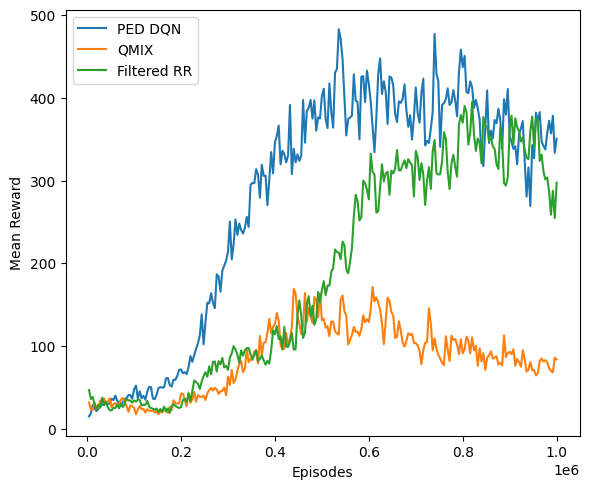

In [97]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

log_file_3 = '/home/sat-swarm/Documents/priority-intrinsic-/results/logs/r-sc-battery_endless-h-1-m-20x20-Pp-9x8-a-ped_dqn-tu-5000-mq-4-rb-20000-mb-32-lr-0.0001-seed-1-0531113725.txt'
log_file_6 = '/home/sat-swarm/Documents/priority-intrinsic-/results/logs/r-sc-battery_endless-h-1-m-20x20-Pp-9x8-a-qmix_full-tu-5000-mq-4-rb-20000-mb-32-lr-0.0001-seed-1-0520083723.txt'
log_file_65 = '/home/sat-swarm/Documents/priority-intrinsic-/results/logs/r-sc-battery_endless-h-1-m-20x20-Pp-9x8-a-ped_dqn-tu-5000-mq-4-rb-20000-mb-32-lr-0.0001-seed-1-0818033146.txt'

def parse_log_file(file_path):
    episodes = []
    rewards = []
    preys_captured = []
    td_errors = []
    RX = []

    with open(file_path, 'r') as file:
        for line in file:
            parts = line.strip().split('\t')
            if len(parts) >= 4:
                if parts[2] == 'steps':
                    episodes.append(int(parts[1]))
                elif parts[2] == 'b_rwd':
                    reward_values = list(map(float, parts[3:]))
                    rewards.append(np.mean(reward_values))  # Compute mean reward
                elif parts[2] == 'captr':
                    preys_values = list(map(float, parts[3:]))
                    preys_captured.append(np.mean(preys_values))  # Compute mean preys captured
                elif parts[2] == 'td_er':
                    td_error_values = list(map(float, parts[3:]))
                    td_errors.append(np.mean(td_error_values))  # Compute mean TD error
                elif parts[2] == 'RX':
                    rx_list = list(map(float, parts[3:]))
                    RX.append(np.mean(rx_list))  # Compute mean TD error

    return episodes, rewards, preys_captured, td_errors, RX

def smooth_data(data, alpha=0.6):
    smoothed_data = []
    for i, value in enumerate(data):
        if i == 0:
            smoothed_data.append(value)
        else:
            smoothed_value = alpha * value + (1 - alpha) * smoothed_data[i-1]
            smoothed_data.append(smoothed_value)
    return smoothed_data

episodes_3, rewards_3, preys_3, td_errors_3, RX_3 = parse_log_file(log_file_3)
episodes_6, rewards_6, preys_6, td_errors_6, RX_6 = parse_log_file(log_file_6)
episodes_65, rewards_65, preys_65, td_errors_65, RX_65 = parse_log_file(log_file_65)

# Smooth the data
smoothed_rewards_3 = smooth_data(rewards_3)
smoothed_rewards_6 = smooth_data(rewards_6)
smoothed_rewards_65 = smooth_data(rewards_65)

smoothed_preys_3 = smooth_data(preys_3)
smoothed_preys_6 = smooth_data(preys_6)
smoothed_preys_65 = smooth_data(preys_65)

smoothed_td_errors_3 = smooth_data(td_errors_3)
smoothed_td_errors_6 = smooth_data(td_errors_6)
smoothed_td_errors_65 = smooth_data(td_errors_65)

# Ensure TensorFlow uses the correct device
device = "GPU" if tf.config.list_physical_devices('GPU') else "CPU"
print("TensorFlow device:", device)

# Plot the rewards, preys captured, and TD errors from all files
plt.figure(facecolor='white', figsize=(6,5))

plt.plot(episodes_3, smoothed_rewards_3, label='PED DQN')
plt.plot(episodes_6, smoothed_rewards_6, label='QMIX')

plt.plot(episodes_65, smoothed_rewards_65, label='Filtered RR')

plt.xlabel('Episodes')
plt.ylabel('Mean Reward')
plt.legend()
plt.grid(False)


plt.tight_layout()
plt.show()

TensorFlow device: CPU


2024-08-27 02:36:58.475927: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1960] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


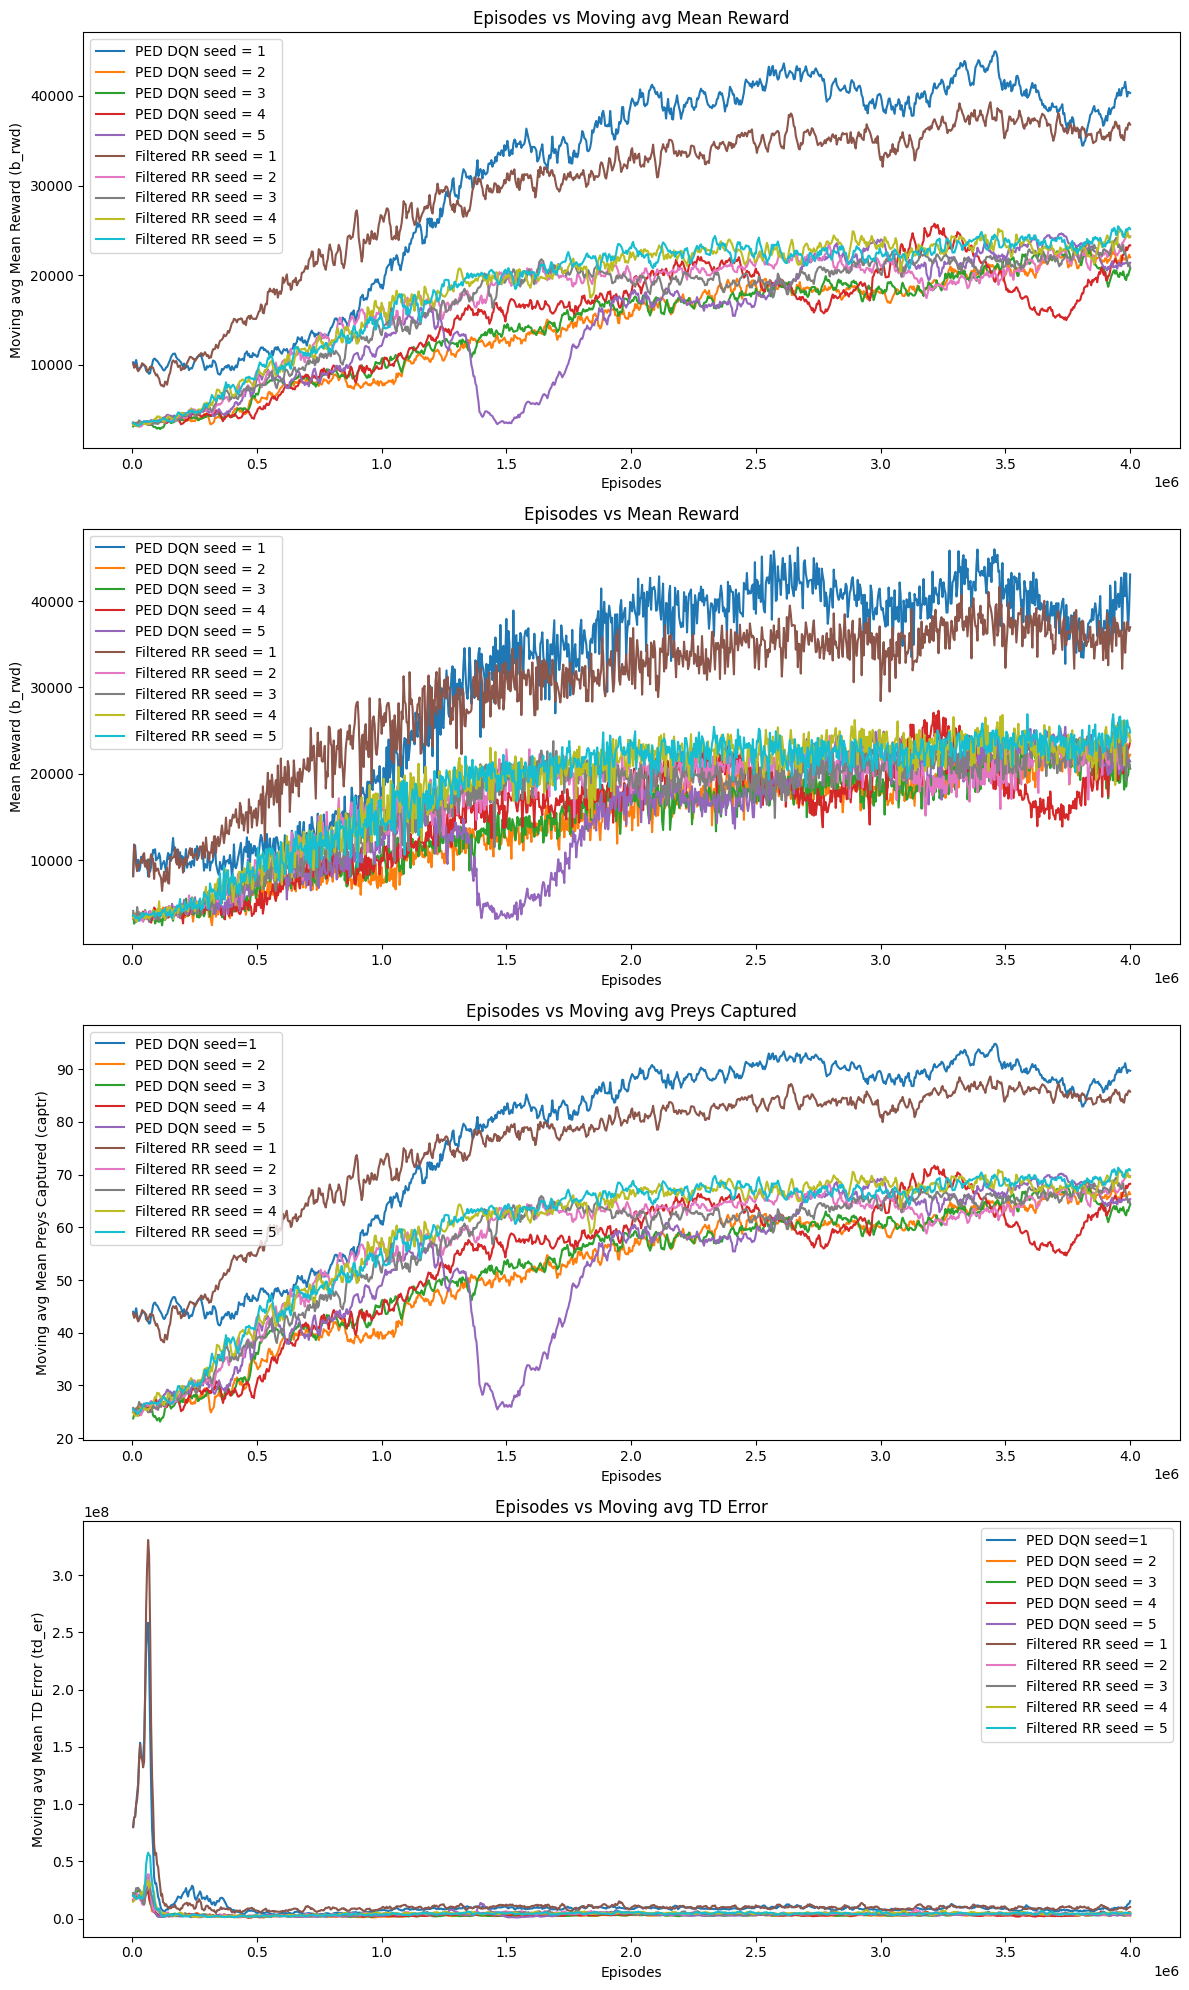

In [3]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

#seed 1 reputation
log_file_5000 = '/home/sat-swarm/Documents/priority-intrinsic-/results/logs/r-sc-battery_endless-h-1-m-11x11-Pp-22x21-a-ped_dqn-tu-5000-mq-4-rb-20000-mb-32-lr-0.0001-seed-1-0819145958.txt'
log_file_6000 = '/home/sat-swarm/Documents/priority-intrinsic-/results/logs/r-sc-battery_endless-h-1-m-11x11-Pp-22x21-a-ped_dqn-tu-5000-mq-4-rb-20000-mb-32-lr-0.0001-seed-1-0821154431.txt'

#seed 4 reputation
log_file_11 = '/home/sat-swarm/Documents/priority-intrinsic-/results/logs/r-sc-battery_endless-h-1-m-12x12-Pp-20x19-a-ped_dqn-tu-5000-mq-4-rb-20000-mb-32-lr-0.0001-seed-4-0807175509.txt'
log_file_111 = '/home/sat-swarm/Documents/priority-intrinsic-/results/logs/r-sc-battery_endless-h-1-m-12x12-Pp-20x19-a-ped_dqn-tu-5000-mq-4-rb-20000-mb-32-lr-0.0001-seed-4-0807175509.txt'

#seed 2 original
log_file_700000 = '/home/sat-swarm/Documents/priority-intrinsic-/results/logs/r-sc-battery_endless-h-1-m-12x12-Pp-20x19-a-ped_dqn-tu-5000-mq-4-rb-20000-mb-32-lr-0.0001-seed-2-0630171039.txt'


#seed 3 original
log_file_7000000 = '/home/sat-swarm/Documents/priority-intrinsic-/results/logs/r-sc-battery_endless-h-1-m-12x12-Pp-20x19-a-ped_dqn-tu-5000-mq-4-rb-20000-mb-32-lr-0.0001-seed-3-0702134029.txt'

#seed 4 original
log_file_777 = '/home/sat-swarm/Documents/priority-intrinsic-/results/logs/r-sc-battery_endless-h-1-m-12x12-Pp-20x19-a-ped_dqn-tu-5000-mq-4-rb-20000-mb-32-lr-0.0001-seed-4-0707023135.txt'


#seed 5 original
log_file_2 = '/home/sat-swarm/Documents/priority-intrinsic-/results/logs/r-sc-battery_endless-h-1-m-12x12-Pp-20x19-a-ped_dqn-tu-5000-mq-4-rb-20000-mb-32-lr-0.0001-seed-5-0816123818.txt'



#reputation seed 2 
log_file_110 = '/home/sat-swarm/Documents/priority-intrinsic-/results/logs/r-sc-battery_endless-h-1-m-12x12-Pp-20x19-a-ped_dqn-tu-5000-mq-4-rb-20000-mb-32-lr-0.0001-seed-2-0811125536.txt'

#reputation seed 3
log_file_1100 = '/home/sat-swarm/Documents/priority-intrinsic-/results/logs/r-sc-battery_endless-h-1-m-12x12-Pp-20x19-a-ped_dqn-tu-5000-mq-4-rb-20000-mb-32-lr-0.0001-seed-3-0809172613.txt'

#reputation seed 5
log_file_22 = '/home/sat-swarm/Documents/priority-intrinsic-/results/logs/r-sc-battery_endless-h-1-m-12x12-Pp-20x19-a-ped_dqn-tu-5000-mq-4-rb-20000-mb-32-lr-0.0001-seed-5-0814000342.txt'

def parse_log_file(file_path):
    episodes = []
    rewards = []
    preys_captured = []
    td_errors = []
    RX = []

    with open(file_path, 'r') as file:
        for line in file:
            parts = line.strip().split('\t')
            if len(parts) >= 4:
                if parts[2] == 'steps':
                    episodes.append(int(parts[1]))
                elif parts[2] == 'b_rwd':
                    reward_values = list(map(float, parts[3:]))
                    rewards.append(np.mean(reward_values))  # Compute mean reward
                elif parts[2] == 'captr':
                    preys_values = list(map(float, parts[3:]))
                    preys_captured.append(np.mean(preys_values))  # Compute mean preys captured
                elif parts[2] == 'td_er':
                    td_error_values = list(map(float, parts[3:]))
                    td_errors.append(np.mean(td_error_values))  # Compute mean TD error
                elif parts[2] == 'RX':
                    rx_list = list(map(float, parts[3:]))
                    RX.append(np.mean(rx_list))  # Compute mean TD error

    return episodes, rewards, preys_captured, td_errors, RX

from scipy.ndimage import uniform_filter1d

def moving_average(data, window_size=5):
    return uniform_filter1d(data, size=window_size)

episodes_5000, rewards_5000, preys_5000, td_errors_5000, RX_5000 = parse_log_file(log_file_5000)
episodes_6000, rewards_6000, preys_6000, td_errors_6000, RX_6000 = parse_log_file(log_file_6000)
episodes_700000, rewards_700000, preys_700000, td_errors_700000, RX_700000 = parse_log_file(log_file_700000)
episodes_7000000, rewards_7000000, preys_7000000, td_errors_7000000, RX_7000000 = parse_log_file(log_file_7000000)
episodes_777, rewards_777, preys_777, td_errors_777, RX_777 = parse_log_file(log_file_777)
episodes_111, rewards_111, preys_111, td_errors_111, RX_111 = parse_log_file(log_file_111)
episodes_2, rewards_2, preys_2, td_errors_2, RX_2 = parse_log_file(log_file_2)
episodes_22, rewards_22, preys_22, td_errors_22, RX_22 = parse_log_file(log_file_22)


episodes_11, rewards_11, preys_11, td_errors_11, RX_11 = parse_log_file(log_file_11)
episodes_110, rewards_110, preys_110, td_errors_110, RX_110 = parse_log_file(log_file_110)
episodes_1100, rewards_1100, preys_1100, td_errors_1100, RX_1100 = parse_log_file(log_file_1100)

moving_avg_rewards_5000 = moving_average(rewards_5000)
moving_avg_rewards_6000 = moving_average(rewards_6000)
moving_avg_rewards_7000000 = moving_average(rewards_7000000)
moving_avg_rewards_777 = moving_average(rewards_777)
moving_avg_rewards_111 = moving_average(rewards_111)
moving_avg_rewards_111 = moving_average(rewards_111)
moving_avg_rewards_110 = moving_average(rewards_110)
moving_avg_rewards_1100 = moving_average(rewards_1100)
moving_avg_rewards_2 = moving_average(rewards_2)
moving_avg_rewards_22 = moving_average(rewards_22)

moving_avg_rewards_700000 = moving_average(rewards_700000)

moving_avg_rewards_11 = moving_average(rewards_11)

moving_avg_preys_5000 = moving_average(preys_5000)
moving_avg_preys_6000 = moving_average(preys_6000)
moving_avg_preys_777 = moving_average(preys_777)
moving_avg_preys_111 = moving_average(preys_111)
moving_avg_preys_11 = moving_average(preys_11)
moving_avg_preys_110 = moving_average(preys_110)
moving_avg_preys_1100 = moving_average(preys_1100)
moving_avg_preys_2 = moving_average(preys_2)
moving_avg_preys_22 = moving_average(preys_22)

moving_avg_preys_7000000 = moving_average(preys_7000000)
moving_avg_preys_700000 = moving_average(preys_700000)

moving_avg_td_errors_5000 = moving_average(td_errors_5000)
moving_avg_td_errors_6000 = moving_average(td_errors_6000)
moving_avg_td_errors_7000000 = moving_average(td_errors_7000000)
moving_avg_td_errors_777 = moving_average(td_errors_777)
moving_avg_td_errors_111 = moving_average(td_errors_111)
moving_avg_td_errors_11 = moving_average(td_errors_11)
moving_avg_td_errors_110 = moving_average(td_errors_110)
moving_avg_td_errors_1100 = moving_average(td_errors_1100)
moving_avg_td_errors_2 = moving_average(td_errors_2)
moving_avg_td_errors_22 = moving_average(td_errors_22)


moving_avg_td_errors_700000 = moving_average(td_errors_700000)


# Ensure TensorFlow uses the correct device
device = "GPU" if tf.config.list_physical_devices('GPU') else "CPU"
print("TensorFlow device:", device)

# Plot the rewards, preys captured, and TD errors from all files
plt.figure(facecolor='white', figsize=(12, 20))

plt.subplot(4, 1, 1)
plt.plot(episodes_6000, moving_avg_rewards_6000, label='PED DQN seed = 1')
plt.plot(episodes_700000, moving_avg_rewards_700000, label='PED DQN seed = 2')
plt.plot(episodes_7000000, moving_avg_rewards_7000000, label='PED DQN seed = 3')
plt.plot(episodes_777, moving_avg_rewards_777, label='PED DQN seed = 4')
plt.plot(episodes_2, moving_avg_rewards_2, label='PED DQN seed = 5')

plt.plot(episodes_5000, moving_avg_rewards_5000, label='Filtered RR seed = 1')
plt.plot(episodes_110, moving_avg_rewards_110, label='Filtered RR seed = 2')
plt.plot(episodes_1100, moving_avg_rewards_1100, label='Filtered RR seed = 3')
plt.plot(episodes_11, moving_avg_rewards_11, label='Filtered RR seed = 4')

plt.plot(episodes_22, moving_avg_rewards_22, label='Filtered RR seed = 5')

plt.xlabel('Episodes')
plt.ylabel('Moving avg Mean Reward (b_rwd)')
plt.title('Episodes vs Moving avg Mean Reward')
plt.legend()
plt.grid(False)

plt.subplot(4, 1, 2)
plt.plot(episodes_6000, rewards_6000, label='PED DQN seed = 1')

plt.plot(episodes_700000, rewards_700000, label='PED DQN seed = 2')
plt.plot(episodes_7000000, rewards_7000000, label='PED DQN seed = 3')
plt.plot(episodes_777, rewards_777, label='PED DQN seed = 4')
plt.plot(episodes_2, rewards_2, label='PED DQN seed = 5')

plt.plot(episodes_5000, rewards_5000, label='Filtered RR seed = 1')

plt.plot(episodes_110, rewards_110, label='Filtered RR seed = 2')
plt.plot(episodes_1100, rewards_1100, label='Filtered RR seed = 3')
plt.plot(episodes_11, rewards_11, label='Filtered RR seed = 4')
plt.plot(episodes_22, rewards_22, label='Filtered RR seed = 5')

plt.xlabel('Episodes')
plt.ylabel('Mean Reward (b_rwd)')
plt.title('Episodes vs Mean Reward')
plt.legend()
plt.grid(False)


plt.subplot(4, 1, 3)
plt.plot(episodes_6000, moving_avg_preys_6000, label='PED DQN seed=1')
plt.plot(episodes_700000, moving_avg_preys_700000, label='PED DQN seed = 2')
plt.plot(episodes_7000000, moving_avg_preys_7000000, label='PED DQN seed = 3')
plt.plot(episodes_777, moving_avg_preys_777, label='PED DQN seed = 4')
plt.plot(episodes_2, moving_avg_preys_2, label='PED DQN seed = 5')

plt.plot(episodes_5000, moving_avg_preys_5000, label='Filtered RR seed = 1')

plt.plot(episodes_110, moving_avg_preys_110, label='Filtered RR seed = 2')
plt.plot(episodes_1100, moving_avg_preys_1100, label='Filtered RR seed = 3')
plt.plot(episodes_11, moving_avg_preys_11, label='Filtered RR seed = 4')
plt.plot(episodes_22, moving_avg_preys_22, label='Filtered RR seed = 5')


plt.xlabel('Episodes')
plt.ylabel('Moving avg Mean Preys Captured (captr)')
plt.title('Episodes vs Moving avg Preys Captured')
plt.legend() 
plt.grid(False)


plt.subplot(4, 1, 4)
plt.plot(episodes_6000, moving_avg_td_errors_6000, label='PED DQN seed=1')
plt.plot(episodes_700000, moving_avg_td_errors_700000, label='PED DQN seed = 2')
plt.plot(episodes_7000000, moving_avg_td_errors_7000000, label='PED DQN seed = 3')
plt.plot(episodes_777, moving_avg_td_errors_777, label='PED DQN seed = 4')
plt.plot(episodes_2, moving_avg_td_errors_2, label='PED DQN seed = 5')

plt.plot(episodes_5000, moving_avg_td_errors_5000, label='Filtered RR seed = 1')

plt.plot(episodes_110, moving_avg_td_errors_110, label='Filtered RR seed = 2')
plt.plot(episodes_1100, moving_avg_td_errors_1100, label='Filtered RR seed = 3')
plt.plot(episodes_11, moving_avg_td_errors_11, label='Filtered RR seed = 4')
plt.plot(episodes_22, moving_avg_td_errors_22, label='Filtered RR seed = 5')



plt.xlabel('Episodes')
plt.ylabel('Moving avg Mean TD Error (td_er)')
plt.title('Episodes vs Moving avg TD Error')
plt.legend()


plt.grid(False)



plt.tight_layout()
plt.show()

TensorFlow device: CPU


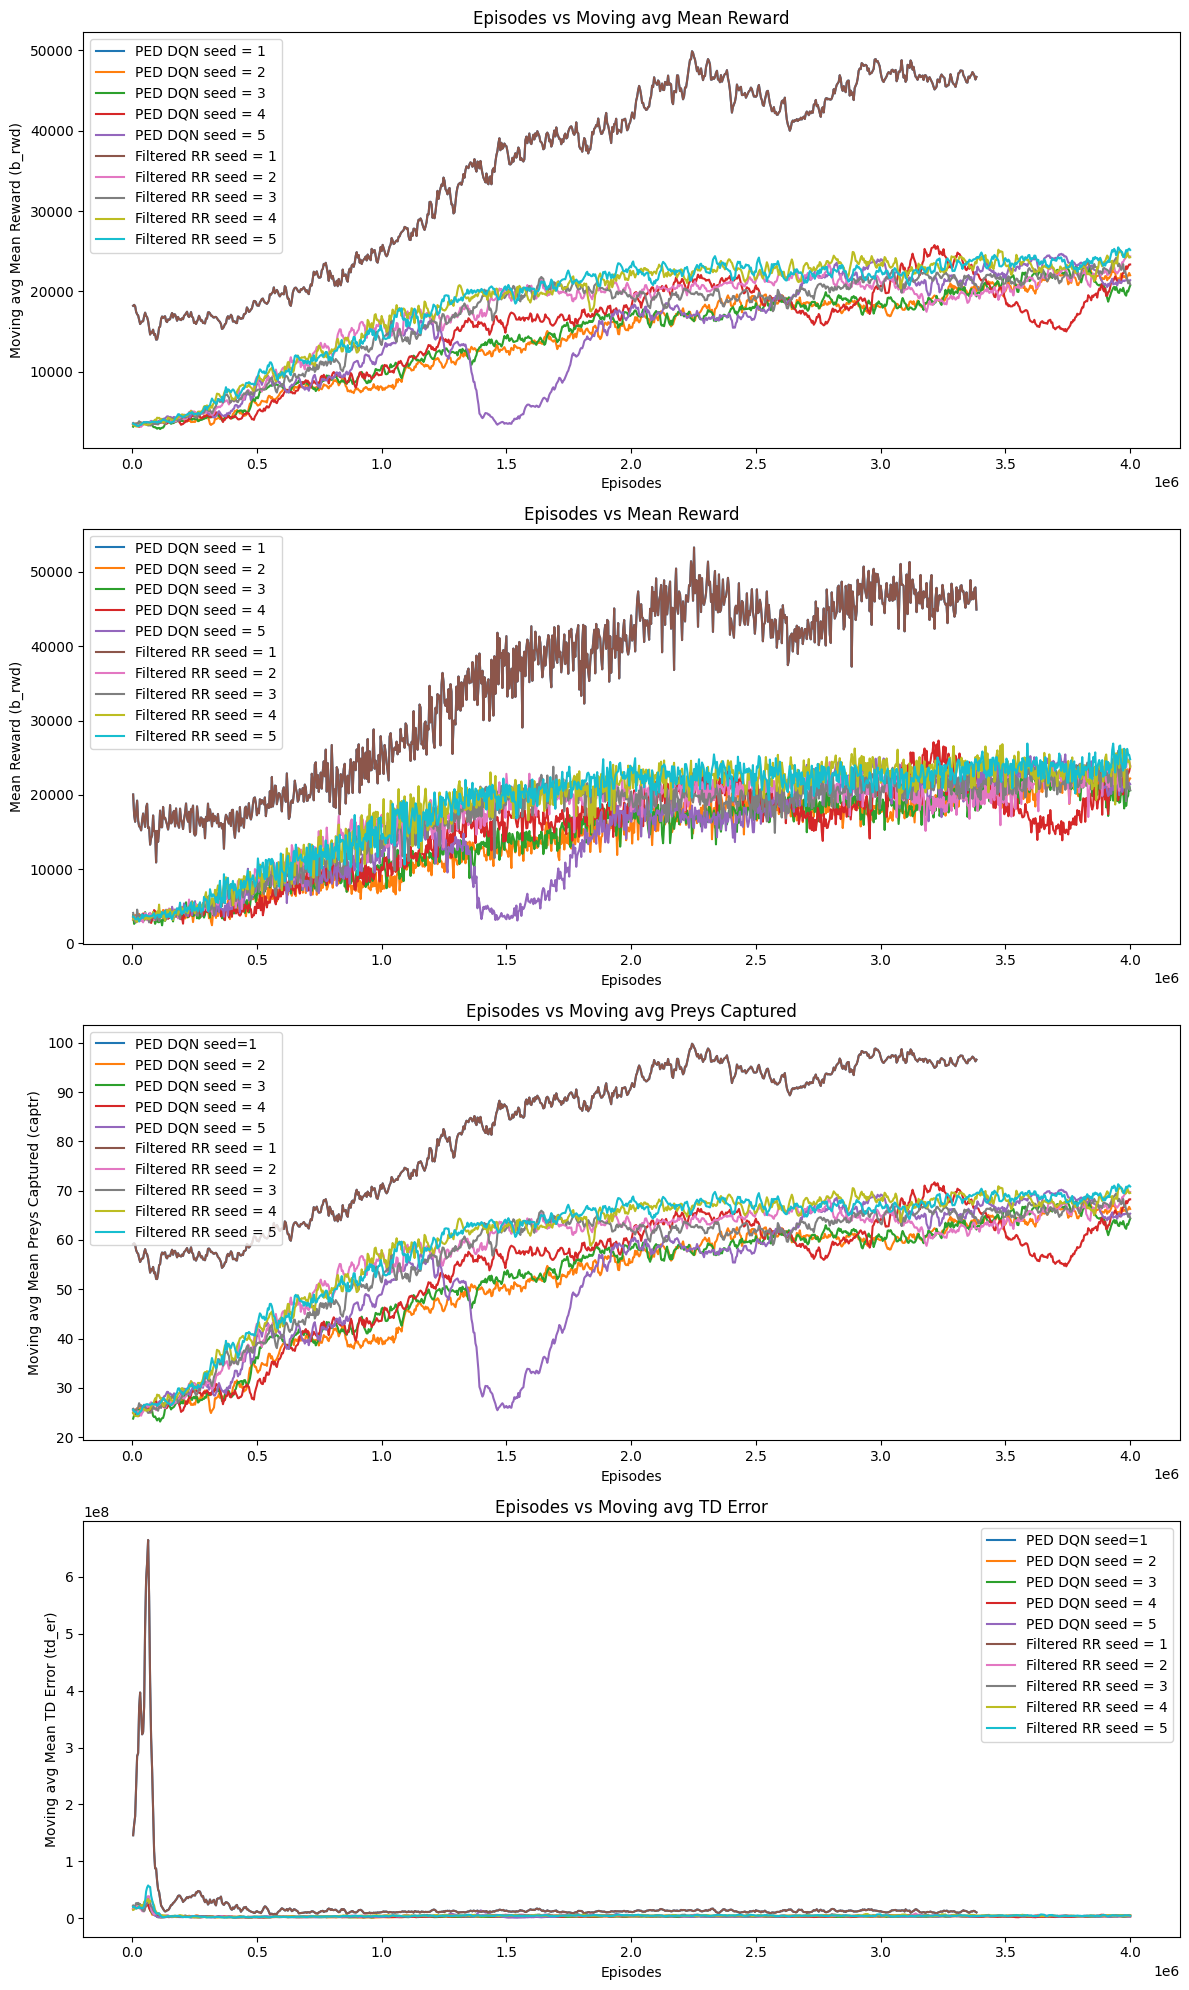

In [6]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

#seed 1 reputation
log_file_5000 = '/home/sat-swarm/Documents/priority-intrinsic-/results/logs/r-sc-battery_endless-h-1-m-10x10-Pp-22x21-a-ped_dqn-tu-5000-mq-4-rb-20000-mb-32-lr-0.0001-seed-1-0827193311.txt'
log_file_6000 = '/home/sat-swarm/Documents/priority-intrinsic-/results/logs/r-sc-battery_endless-h-1-m-10x10-Pp-22x21-a-ped_dqn-tu-5000-mq-4-rb-20000-mb-32-lr-0.0001-seed-1-0827193311.txt'
 
def parse_log_file(file_path):
    episodes = []
    rewards = []
    preys_captured = []
    td_errors = []
    RX = []

    with open(file_path, 'r') as file:
        for line in file:
            parts = line.strip().split('\t')
            if len(parts) >= 4:
                if parts[2] == 'steps':
                    episodes.append(int(parts[1]))
                elif parts[2] == 'b_rwd':
                    reward_values = list(map(float, parts[3:]))
                    rewards.append(np.mean(reward_values))  # Compute mean reward
                elif parts[2] == 'captr':
                    preys_values = list(map(float, parts[3:]))
                    preys_captured.append(np.mean(preys_values))  # Compute mean preys captured
                elif parts[2] == 'td_er':
                    td_error_values = list(map(float, parts[3:]))
                    td_errors.append(np.mean(td_error_values))  # Compute mean TD error
                elif parts[2] == 'RX':
                    rx_list = list(map(float, parts[3:]))
                    RX.append(np.mean(rx_list))  # Compute mean TD error

    return episodes, rewards, preys_captured, td_errors, RX

from scipy.ndimage import uniform_filter1d

def moving_average(data, window_size=5):
    return uniform_filter1d(data, size=window_size)

episodes_5000, rewards_5000, preys_5000, td_errors_5000, RX_5000 = parse_log_file(log_file_5000)
episodes_6000, rewards_6000, preys_6000, td_errors_6000, RX_6000 = parse_log_file(log_file_6000)

moving_avg_rewards_5000 = moving_average(rewards_5000)
moving_avg_rewards_6000 = moving_average(rewards_6000)

moving_avg_preys_5000 = moving_average(preys_5000)
moving_avg_preys_6000 = moving_average(preys_6000)

moving_avg_td_errors_5000 = moving_average(td_errors_5000)
moving_avg_td_errors_6000 = moving_average(td_errors_6000)


# Ensure TensorFlow uses the correct device
device = "GPU" if tf.config.list_physical_devices('GPU') else "CPU"
print("TensorFlow device:", device)

# Plot the rewards, preys captured, and TD errors from all files
plt.figure(facecolor='white', figsize=(12, 20))

plt.subplot(4, 1, 1)
plt.plot(episodes_6000, moving_avg_rewards_6000, label='PED DQN seed = 1')

plt.plot(episodes_5000, moving_avg_rewards_5000, label='Filtered RR seed = 1')
 
plt.xlabel('Episodes')
plt.ylabel('Moving avg Mean Reward (b_rwd)')
plt.title('Episodes vs Moving avg Mean Reward')
plt.legend()
plt.grid(False)

plt.subplot(4, 1, 2)
plt.plot(episodes_6000, rewards_6000, label='PED DQN seed = 1')
 
plt.plot(episodes_5000, rewards_5000, label='Filtered RR seed = 1')

 
plt.xlabel('Episodes')
plt.ylabel('Mean Reward (b_rwd)')
plt.title('Episodes vs Mean Reward')
plt.legend()
plt.grid(False)


plt.subplot(4, 1, 3)
plt.plot(episodes_6000, moving_avg_preys_6000, label='PED DQN seed=1')
 
plt.plot(episodes_5000, moving_avg_preys_5000, label='Filtered RR seed = 1')
 

plt.xlabel('Episodes')
plt.ylabel('Moving avg Mean Preys Captured (captr)')
plt.title('Episodes vs Moving avg Preys Captured')
plt.legend() 
plt.grid(False)


plt.subplot(4, 1, 4)
plt.plot(episodes_6000, moving_avg_td_errors_6000, label='PED DQN seed=1')
 
plt.plot(episodes_5000, moving_avg_td_errors_5000, label='Filtered RR seed = 1')




plt.xlabel('Episodes')
plt.ylabel('Moving avg Mean TD Error (td_er)')
plt.title('Episodes vs Moving avg TD Error')
plt.legend()


plt.grid(False)



plt.tight_layout()
plt.show()

TensorFlow device: CPU


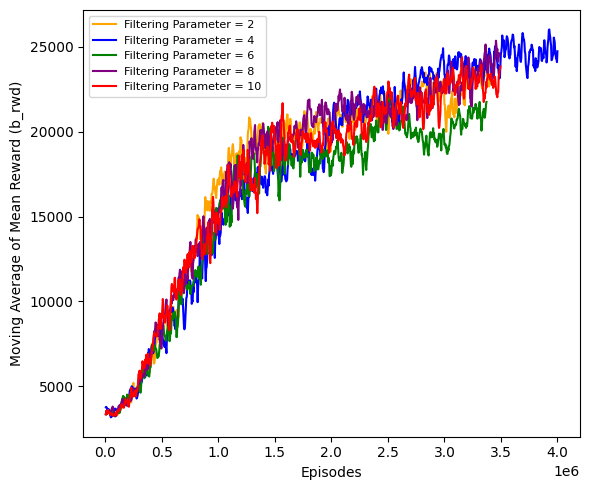

In [3]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

#Reputation filtering parameter = 2
log_file_6000 = '/home/aim-pfe/Documents/FRR/priority-intrinsic-/results/logs/default_folder/r-sc-battery_endless-h-1-m-12x12-Pp-20x19-a-ped_dqn-tu-5000-mq-4-rb-20000-mb-32-lr-0.0001-seed-1-0902015358.txt'
#Reputation filtering parameter = 4

log_file_7000 = '/home/aim-pfe/Documents/PED333/PED33/results/logs/default_folder/r-sc-battery_endless-h-1-m-12x12-Pp-20x19-a-ped_dqn-tu-5000-mq-4-rb-20000-mb-32-lr-0.0001-seed-1-0621234216.txt'
#Reputation filtering parameter = 6

log_file_5000 = '/home/aim-pfe/Documents/FRR/FRR2/priority-intrinsic-/results/logs/default_folder/r-sc-battery_endless-h-1-m-12x12-Pp-20x19-a-ped_dqn-tu-5000-mq-4-rb-20000-mb-32-lr-0.0001-seed-1-0902021337.txt'


#Reputation filtering parameter = 8
log_file_55000 = '/home/aim-pfe/Documents/FRR/priority-intrinsic-/results/logs/default_folder/r-sc-battery_endless-h-1-m-12x12-Pp-20x19-a-ped_dqn-tu-5000-mq-4-rb-20000-mb-32-lr-0.0001-seed-1-0904110623.txt'


#Reputation filtering parameter = 10
log_file_77000 = '/home/aim-pfe/Documents/FRR/FRR2/priority-intrinsic-/results/logs/default_folder/r-sc-battery_endless-h-1-m-12x12-Pp-20x19-a-ped_dqn-tu-5000-mq-4-rb-20000-mb-32-lr-0.0001-seed-1-0904110325.txt'


# Function to parse log files
def parse_log_file(file_path):
    episodes = []
    rewards = []
    preys_captured = []
    td_errors = []
    RX = []

    with open(file_path, 'r') as file:
        for line in file:
            parts = line.strip().split('\t')
            if len(parts) >= 4:
                if parts[2] == 'steps':
                    episodes.append(int(parts[1]))
                elif parts[2] == 'b_rwd':
                    reward_values = list(map(float, parts[3:]))
                    rewards.append(np.mean(reward_values))  # Compute mean reward
                elif parts[2] == 'captr':
                    preys_values = list(map(float, parts[3:]))
                    preys_captured.append(np.mean(preys_values))  # Compute mean preys captured
                elif parts[2] == 'td_er':
                    td_error_values = list(map(float, parts[3:]))
                    td_errors.append(np.mean(td_error_values))  # Compute mean TD error
                elif parts[2] == 'RX':
                    rx_list = list(map(float, parts[3:]))
                    RX.append(np.mean(rx_list))  # Compute mean RX

    return episodes, rewards, preys_captured, td_errors, RX

# Function to compute moving average
from scipy.ndimage import uniform_filter1d

def moving_average(data, window_size=5):
    return uniform_filter1d(data, size=window_size)

episodes_5000, rewards_5000, preys_5000, td_errors_5000, RX_5000 = parse_log_file(log_file_5000)
episodes_6000, rewards_6000, preys_6000, td_errors_6000, RX_6000 = parse_log_file(log_file_6000)
episodes_7000, rewards_7000, preys_7000, td_errors_7000, RX_6000 = parse_log_file(log_file_7000)
episodes_55000, rewards_55000, preys_55000, td_errors_55000, RX_55000 = parse_log_file(log_file_55000)
episodes_77000, rewards_77000, preys_77000, td_errors_77000, RX_6000 = parse_log_file(log_file_77000)

moving_avg_rewards_5000 = moving_average(rewards_5000)
moving_avg_rewards_6000 = moving_average(rewards_6000)
moving_avg_rewards_7000 = moving_average(rewards_7000)
moving_avg_rewards_55000 = moving_average(rewards_55000)
moving_avg_rewards_77000 = moving_average(rewards_77000)


# Ensure TensorFlow uses the correct device
device = "GPU" if tf.config.list_physical_devices('GPU') else "CPU"
print("TensorFlow device:", device)

# Plot the rewards with real fluctuations in faded colors
plt.figure(facecolor='white', figsize=(6, 5))
'''
plt.plot(episodes_7000, rewards_7000, color='blue', alpha=0.3)
plt.plot(episodes_77000, rewards_77000, color='red', alpha=0.3)
plt.plot(episodes_5000, rewards_5000,   color='green',alpha=0.3)
plt.plot(episodes_6000, rewards_6000, color='orange', alpha=0.3)
plt.plot(episodes_55000, rewards_55000,   color='purple',alpha=0.3)'''

# Plot moving averages
plt.plot(episodes_6000, moving_avg_rewards_6000, label='Filtering Parameter = 2', color='orange')
plt.plot(episodes_7000, moving_avg_rewards_7000, label='Filtering Parameter = 4',color='blue')
plt.plot(episodes_5000, moving_avg_rewards_5000, label='Filtering Parameter = 6',color='green')
plt.plot(episodes_55000, moving_avg_rewards_55000, label='Filtering Parameter = 8',color='purple')
plt.plot(episodes_77000, moving_avg_rewards_77000, label='Filtering Parameter = 10',color='red')

plt.xlabel('Episodes')
plt.ylabel('Moving Average of Mean Reward (b_rwd)')
plt.legend(loc='best', fontsize=8)
plt.grid(False)
plt.tight_layout()

plt.show()

TensorFlow device: CPU


<Figure size 600x500 with 0 Axes>

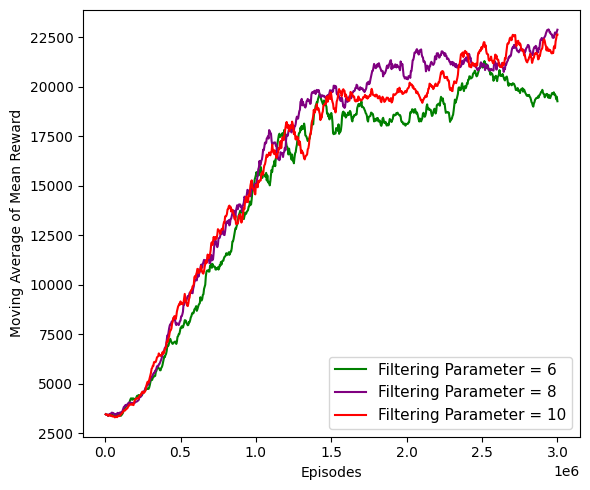

In [223]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

#Reputation filtering parameter = 2
log_file_6000 = '/home/aim-pfe/Documents/FRR/priority-intrinsic-/results/logs/default_folder/r-sc-battery_endless-h-1-m-12x12-Pp-20x19-a-ped_dqn-tu-5000-mq-4-rb-20000-mb-32-lr-0.0001-seed-1-0902015358.txt'
#Reputation filtering parameter = 4

log_file_7000 = '/home/aim-pfe/Documents/PED333/PED33/results/logs/default_folder/r-sc-battery_endless-h-1-m-12x12-Pp-20x19-a-ped_dqn-tu-5000-mq-4-rb-20000-mb-32-lr-0.0001-seed-1-0621234216.txt'
#Reputation filtering parameter = 6

log_file_5000 = '/home/aim-pfe/Documents/FRR/FRR2/priority-intrinsic-/results/logs/default_folder/r-sc-battery_endless-h-1-m-12x12-Pp-20x19-a-ped_dqn-tu-5000-mq-4-rb-20000-mb-32-lr-0.0001-seed-1-0902021337.txt'


#Reputation filtering parameter = 8
log_file_55000 = '/home/aim-pfe/Documents/FRR/priority-intrinsic-/results/logs/default_folder/r-sc-battery_endless-h-1-m-12x12-Pp-20x19-a-ped_dqn-tu-5000-mq-4-rb-20000-mb-32-lr-0.0001-seed-1-0904110623.txt'


#Reputation filtering parameter = 10
log_file_77000 = '/home/aim-pfe/Documents/FRR/FRR2/priority-intrinsic-/results/logs/default_folder/r-sc-battery_endless-h-1-m-12x12-Pp-20x19-a-ped_dqn-tu-5000-mq-4-rb-20000-mb-32-lr-0.0001-seed-1-0904110325.txt'


# Function to parse log files
def parse_log_file(file_path):
    episodes = []
    rewards = []
    preys_captured = []
    td_errors = []
    RX = []

    with open(file_path, 'r') as file:
        for line in file:
            parts = line.strip().split('\t')
            if len(parts) >= 4:
                if parts[2] == 'steps':
                    episodes.append(int(parts[1]))
                elif parts[2] == 'b_rwd':
                    reward_values = list(map(float, parts[3:]))
                    rewards.append(np.mean(reward_values))  # Compute mean reward
                elif parts[2] == 'captr':
                    preys_values = list(map(float, parts[3:]))
                    preys_captured.append(np.mean(preys_values))  # Compute mean preys captured
                elif parts[2] == 'td_er':
                    td_error_values = list(map(float, parts[3:]))
                    td_errors.append(np.mean(td_error_values))  # Compute mean TD error
                elif parts[2] == 'RX':
                    rx_list = list(map(float, parts[3:]))
                    RX.append(np.mean(rx_list))  # Compute mean RX

    return episodes, rewards, preys_captured, td_errors, RX

# Function to compute moving average
from scipy.ndimage import uniform_filter1d

def moving_average(data, window_size=15):
    return uniform_filter1d(data, size=window_size)

episodes_5000, rewards_5000, preys_5000, td_errors_5000, RX_5000 = parse_log_file(log_file_5000)
episodes_6000, rewards_6000, preys_6000, td_errors_6000, RX_6000 = parse_log_file(log_file_6000)
episodes_7000, rewards_7000, preys_7000, td_errors_7000, RX_6000 = parse_log_file(log_file_7000)
episodes_55000, rewards_55000, preys_55000, td_errors_55000, RX_55000 = parse_log_file(log_file_55000)
episodes_77000, rewards_77000, preys_77000, td_errors_77000, RX_6000 = parse_log_file(log_file_77000)

moving_avg_rewards_5000 = moving_average(rewards_5000)
moving_avg_rewards_6000 = moving_average(rewards_6000)
moving_avg_rewards_7000 = moving_average(rewards_7000)
moving_avg_rewards_55000 = moving_average(rewards_55000)
moving_avg_rewards_77000 = moving_average(rewards_77000)


# Ensure TensorFlow uses the correct device
device = "GPU" if tf.config.list_physical_devices('GPU') else "CPU"
print("TensorFlow device:", device)

# Plot the rewards with real fluctuations in faded colors
plt.figure(facecolor='white', figsize=(6, 5))
'''
plt.plot(episodes_7000, rewards_7000, color='blue', alpha=0.3)
plt.plot(episodes_77000, rewards_77000, color='red', alpha=0.3)
plt.plot(episodes_5000, rewards_5000,   color='green',alpha=0.3)
plt.plot(episodes_6000, rewards_6000, color='orange', alpha=0.3)
plt.plot(episodes_55000, rewards_55000,   color='purple',alpha=0.3)'''
# Function to limit the episodes and corresponding data to 3 million time steps
def limit_time_steps(episodes, data, max_steps=3000000):
    limited_episodes = []
    limited_data = []
    for ep, d in zip(episodes, data):
        if ep <= max_steps:
            limited_episodes.append(ep)
            limited_data.append(d)
        else:
            break
    return limited_episodes, limited_data

# Apply the limit to each set of episodes and moving averages
limited_episodes_6000, limited_rewards_6000 = limit_time_steps(episodes_6000, moving_avg_rewards_6000)
limited_episodes_7000, limited_rewards_7000 = limit_time_steps(episodes_7000, moving_avg_rewards_7000)
limited_episodes_5000, limited_rewards_5000 = limit_time_steps(episodes_5000, moving_avg_rewards_5000)
limited_episodes_55000, limited_rewards_55000 = limit_time_steps(episodes_55000, moving_avg_rewards_55000)
limited_episodes_77000, limited_rewards_77000 = limit_time_steps(episodes_77000, moving_avg_rewards_77000)

# Plot the rewards with the 3 million time steps limit
plt.figure(facecolor='white', figsize=(6, 5))

plt.plot(limited_episodes_5000, limited_rewards_5000, label='Filtering Parameter = 6', color='green')
plt.plot(limited_episodes_55000, limited_rewards_55000, label='Filtering Parameter = 8', color='purple')
plt.plot(limited_episodes_77000, limited_rewards_77000, label='Filtering Parameter = 10', color='red')
plt.xlabel('Episodes')
plt.ylabel('Moving Average of Mean Reward')
plt.legend(loc='best', fontsize=11)
plt.grid(False)
plt.tight_layout()

plt.show()


TensorFlow device: CPU


<Figure size 600x500 with 0 Axes>

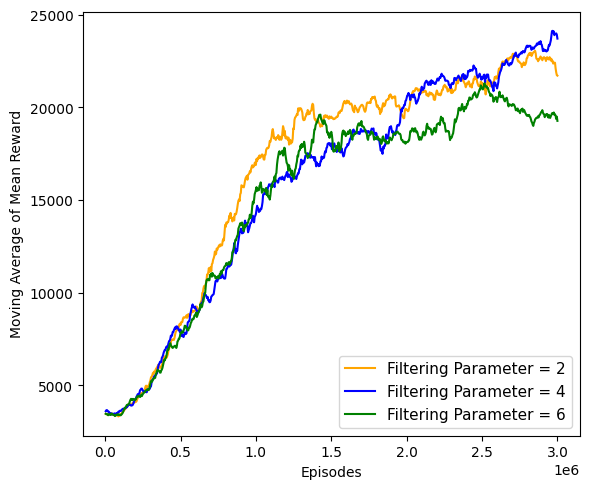

In [222]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

#Reputation filtering parameter = 2
log_file_6000 = '/home/aim-pfe/Documents/FRR/priority-intrinsic-/results/logs/default_folder/r-sc-battery_endless-h-1-m-12x12-Pp-20x19-a-ped_dqn-tu-5000-mq-4-rb-20000-mb-32-lr-0.0001-seed-1-0902015358.txt'
#Reputation filtering parameter = 4

log_file_7000 = '/home/aim-pfe/Documents/PED333/PED33/results/logs/default_folder/r-sc-battery_endless-h-1-m-12x12-Pp-20x19-a-ped_dqn-tu-5000-mq-4-rb-20000-mb-32-lr-0.0001-seed-1-0621234216.txt'
#Reputation filtering parameter = 6

log_file_5000 = '/home/aim-pfe/Documents/FRR/FRR2/priority-intrinsic-/results/logs/default_folder/r-sc-battery_endless-h-1-m-12x12-Pp-20x19-a-ped_dqn-tu-5000-mq-4-rb-20000-mb-32-lr-0.0001-seed-1-0902021337.txt'


#Reputation filtering parameter = 8
log_file_55000 = '/home/aim-pfe/Documents/FRR/priority-intrinsic-/results/logs/default_folder/r-sc-battery_endless-h-1-m-12x12-Pp-20x19-a-ped_dqn-tu-5000-mq-4-rb-20000-mb-32-lr-0.0001-seed-1-0904110623.txt'


#Reputation filtering parameter = 10
log_file_77000 = '/home/aim-pfe/Documents/FRR/FRR2/priority-intrinsic-/results/logs/default_folder/r-sc-battery_endless-h-1-m-12x12-Pp-20x19-a-ped_dqn-tu-5000-mq-4-rb-20000-mb-32-lr-0.0001-seed-1-0904110325.txt'


# Function to parse log files
def parse_log_file(file_path):
    episodes = []
    rewards = []
    preys_captured = []
    td_errors = []
    RX = []

    with open(file_path, 'r') as file:
        for line in file:
            parts = line.strip().split('\t')
            if len(parts) >= 4:
                if parts[2] == 'steps':
                    episodes.append(int(parts[1]))
                elif parts[2] == 'b_rwd':
                    reward_values = list(map(float, parts[3:]))
                    rewards.append(np.mean(reward_values))  # Compute mean reward
                elif parts[2] == 'captr':
                    preys_values = list(map(float, parts[3:]))
                    preys_captured.append(np.mean(preys_values))  # Compute mean preys captured
                elif parts[2] == 'td_er':
                    td_error_values = list(map(float, parts[3:]))
                    td_errors.append(np.mean(td_error_values))  # Compute mean TD error
                elif parts[2] == 'RX':
                    rx_list = list(map(float, parts[3:]))
                    RX.append(np.mean(rx_list))  # Compute mean RX

    return episodes, rewards, preys_captured, td_errors, RX

# Function to compute moving average
from scipy.ndimage import uniform_filter1d

def moving_average(data, window_size=15):
    return uniform_filter1d(data, size=window_size)

episodes_5000, rewards_5000, preys_5000, td_errors_5000, RX_5000 = parse_log_file(log_file_5000)
episodes_6000, rewards_6000, preys_6000, td_errors_6000, RX_6000 = parse_log_file(log_file_6000)
episodes_7000, rewards_7000, preys_7000, td_errors_7000, RX_6000 = parse_log_file(log_file_7000)
episodes_55000, rewards_55000, preys_55000, td_errors_55000, RX_55000 = parse_log_file(log_file_55000)
episodes_77000, rewards_77000, preys_77000, td_errors_77000, RX_6000 = parse_log_file(log_file_77000)

moving_avg_rewards_5000 = moving_average(rewards_5000)
moving_avg_rewards_6000 = moving_average(rewards_6000)
moving_avg_rewards_7000 = moving_average(rewards_7000)
moving_avg_rewards_55000 = moving_average(rewards_55000)
moving_avg_rewards_77000 = moving_average(rewards_77000)


# Ensure TensorFlow uses the correct device
device = "GPU" if tf.config.list_physical_devices('GPU') else "CPU"
print("TensorFlow device:", device)

# Plot the rewards with real fluctuations in faded colors
plt.figure(facecolor='white', figsize=(6, 5))
'''
plt.plot(episodes_7000, rewards_7000, color='blue', alpha=0.3)
plt.plot(episodes_77000, rewards_77000, color='red', alpha=0.3)
plt.plot(episodes_5000, rewards_5000,   color='green',alpha=0.3)
plt.plot(episodes_6000, rewards_6000, color='orange', alpha=0.3)
plt.plot(episodes_55000, rewards_55000,   color='purple',alpha=0.3)'''
# Function to limit the episodes and corresponding data to 3 million time steps
def limit_time_steps(episodes, data, max_steps=3000000):
    limited_episodes = []
    limited_data = []
    for ep, d in zip(episodes, data):
        if ep <= max_steps:
            limited_episodes.append(ep)
            limited_data.append(d)
        else:
            break
    return limited_episodes, limited_data

# Apply the limit to each set of episodes and moving averages
limited_episodes_6000, limited_rewards_6000 = limit_time_steps(episodes_6000, moving_avg_rewards_6000)
limited_episodes_7000, limited_rewards_7000 = limit_time_steps(episodes_7000, moving_avg_rewards_7000)
limited_episodes_5000, limited_rewards_5000 = limit_time_steps(episodes_5000, moving_avg_rewards_5000)
limited_episodes_55000, limited_rewards_55000 = limit_time_steps(episodes_55000, moving_avg_rewards_55000)
limited_episodes_77000, limited_rewards_77000 = limit_time_steps(episodes_77000, moving_avg_rewards_77000)

# Plot the rewards with the 3 million time steps limit
plt.figure(facecolor='white', figsize=(6, 5))

# Plot moving averages within the limited time steps
plt.plot(limited_episodes_6000, limited_rewards_6000, label='Filtering Parameter = 2', color='orange')
plt.plot(limited_episodes_7000, limited_rewards_7000, label='Filtering Parameter = 4', color='blue')
plt.plot(limited_episodes_5000, limited_rewards_5000, label='Filtering Parameter = 6', color='green')
plt.xlabel('Episodes')
plt.ylabel('Moving Average of Mean Reward')
plt.legend(loc='lower right', fontsize=11)
plt.grid(False)
plt.tight_layout()

plt.show()


TensorFlow device: CPU


<Figure size 600x500 with 0 Axes>

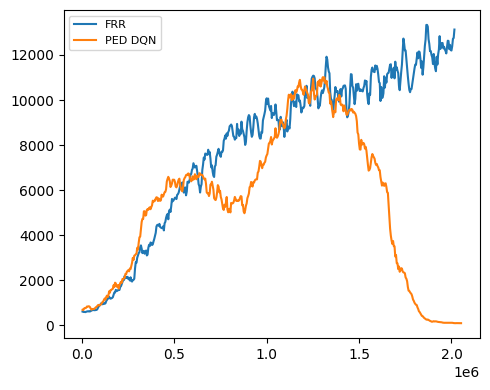

In [155]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

#Reputation filtering parameter = 2
log_file_6000 = '/home/aim-pfe/Documents/FRR/priority-intrinsic-/results/logs/default_folder/r-sc-battery_endless-h-1-m-12x12-Pp-20x19-a-ped_dqn-tu-5000-mq-4-rb-20000-mb-32-lr-0.0001-seed-1-0902015358.txt'
#Reputation filtering parameter = 4

log_file_7000 = '/home/aim-pfe/Documents/PED333/PED33/results/logs/default_folder/r-sc-battery_endless-h-1-m-12x12-Pp-20x19-a-ped_dqn-tu-5000-mq-4-rb-20000-mb-32-lr-0.0001-seed-1-0621234216.txt'
#Reputation filtering parameter = 6

log_file_5000 = '/home/aim-pfe/Documents/FRR/priority-intrinsic-/results/logs/default_folder/r-sc-battery_endless-h-1-m-13x13-Pp-16x15-a-ped_dqn-tu-5000-mq-4-rb-20000-mb-32-lr-0.0001-seed-1-0909042809.txt'


#Reputation filtering parameter = 8
log_file_55000 = '/home/aim-pfe/Documents/FRR/priority-intrinsic-/results/logs/default_folder/r-sc-battery_endless-h-1-m-12x12-Pp-20x19-a-ped_dqn-tu-5000-mq-4-rb-20000-mb-32-lr-0.0001-seed-1-0904110623.txt'


#Reputation filtering parameter = 10
log_file_77000 = '/home/aim-pfe/Documents/PED33/results/logs/default_folder/r-sc-battery_endless-h-1-m-13x13-Pp-16x15-a-ped_dqn-tu-5000-mq-4-rb-20000-mb-32-lr-0.0001-seed-1-0909042850.txt'


# Function to parse log files
def parse_log_file(file_path):
    episodes = []
    rewards = []
    preys_captured = []
    td_errors = []
    RX = []

    with open(file_path, 'r') as file:
        for line in file:
            parts = line.strip().split('\t')
            if len(parts) >= 4:
                if parts[2] == 'steps':
                    episodes.append(int(parts[1]))
                elif parts[2] == 'b_rwd':
                    reward_values = list(map(float, parts[3:]))
                    rewards.append(np.mean(reward_values))  # Compute mean reward
                elif parts[2] == 'captr':
                    preys_values = list(map(float, parts[3:]))
                    preys_captured.append(np.mean(preys_values))  # Compute mean preys captured
                elif parts[2] == 'td_er':
                    td_error_values = list(map(float, parts[3:]))
                    td_errors.append(np.mean(td_error_values))  # Compute mean TD error
                elif parts[2] == 'RX':
                    rx_list = list(map(float, parts[3:]))
                    RX.append(np.mean(rx_list))  # Compute mean RX

    return episodes, rewards, preys_captured, td_errors, RX


# Function to compute moving average
from scipy.ndimage import uniform_filter1d

def moving_average(data, window_size=5):
    return uniform_filter1d(data, size=window_size)

episodes_5000, rewards_5000, preys_5000, td_errors_5000, RX_5000 = parse_log_file(log_file_5000)
episodes_6000, rewards_6000, preys_6000, td_errors_6000, RX_6000 = parse_log_file(log_file_6000)
episodes_7000, rewards_7000, preys_7000, td_errors_7000, RX_6000 = parse_log_file(log_file_7000)
episodes_55000, rewards_55000, preys_55000, td_errors_55000, RX_55000 = parse_log_file(log_file_55000)
episodes_77000, rewards_77000, preys_77000, td_errors_77000, RX_6000 = parse_log_file(log_file_77000)

moving_avg_rewards_5000 = moving_average(rewards_5000)
moving_avg_rewards_6000 = moving_average(rewards_6000)
moving_avg_rewards_7000 = moving_average(rewards_7000)
moving_avg_rewards_55000 = moving_average(rewards_55000)
moving_avg_rewards_77000 = moving_average(rewards_77000)


# Ensure TensorFlow uses the correct device
device = "GPU" if tf.config.list_physical_devices('GPU') else "CPU"
print("TensorFlow device:", device)

# Plot the rewards with real fluctuations in faded colors
plt.figure(facecolor='white', figsize=(6, 5))
'''
plt.plot(episodes_7000, rewards_7000, color='blue', alpha=0.3)
plt.plot(episodes_77000, rewards_77000, color='red', alpha=0.3)
plt.plot(episodes_5000, rewards_5000,   color='green',alpha=0.3)
plt.plot(episodes_6000, rewards_6000, color='orange', alpha=0.3)
plt.plot(episodes_55000, rewards_55000,   color='purple',alpha=0.3)'''
# Function to limit the episodes and corresponding data to 3 million time steps
def limit_time_steps(episodes, data, max_steps=3000000):
    limited_episodes = []
    limited_data = []
    for ep, d in zip(episodes, data):
        if ep <= max_steps:
            limited_episodes.append(ep)
            limited_data.append(d)
        else:
            break
    return limited_episodes, limited_data

# Apply the limit to each set of episodes and moving averages
limited_episodes_6000, limited_rewards_6000 = limit_time_steps(episodes_6000, moving_avg_rewards_6000)
limited_episodes_7000, limited_rewards_7000 = limit_time_steps(episodes_7000, moving_avg_rewards_7000)
limited_episodes_5000, limited_rewards_5000 = limit_time_steps(episodes_5000, moving_avg_rewards_5000)
limited_episodes_55000, limited_rewards_55000 = limit_time_steps(episodes_55000, moving_avg_rewards_55000)
limited_episodes_77000, limited_rewards_77000 = limit_time_steps(episodes_77000, moving_avg_rewards_77000)

# Plot the rewards with the 3 million time steps limit
plt.figure(facecolor='white', figsize=(5, 4))


plt.plot(limited_episodes_5000, limited_rewards_5000, label='FRR')
plt.plot(limited_episodes_77000, limited_rewards_77000, label='PED DQN')


plt.legend(loc='best', fontsize=8)
plt.grid(False)
plt.tight_layout()

plt.show()

TensorFlow device: CPU


<Figure size 600x400 with 0 Axes>

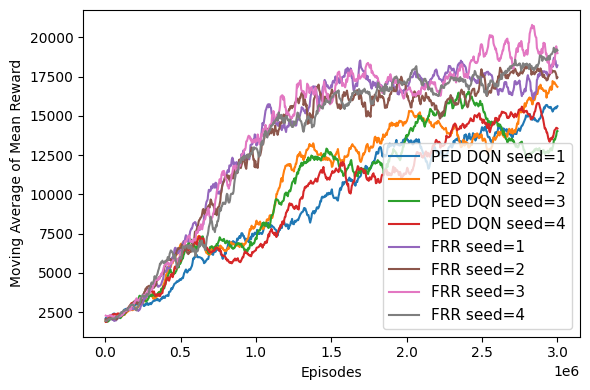

In [274]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

#FRR seed=1
log_file_5000 = '/home/aim-pfe/Documents/FRR/priority-intrinsic-/results/logs/default_folder/r-sc-battery_endless-h-1-m-13x13-Pp-20x19-a-ped_dqn-tu-5000-mq-4-rb-20000-mb-32-lr-0.0001-seed-1-0909212025.txt'
#FRR seed=2
log_file_55000 = '/home/aim-pfe/Documents/FRR/priority-intrinsic-/results/logs/default_folder/r-sc-battery_endless-h-1-m-13x13-Pp-20x19-a-ped_dqn-tu-5000-mq-4-rb-20000-mb-32-lr-0.0001-seed-2-0913152058.txt'

#FRR seed=3
log_file_555000 = '/home/aim-pfe/Documents/FRR/priority-intrinsic-/results/logs/default_folder/r-sc-battery_endless-h-1-m-13x13-Pp-20x19-a-ped_dqn-tu-5000-mq-4-rb-20000-mb-32-lr-0.0001-seed-3-0914143708.txt'
#FRR seed=4
log_file_5555000 = '/home/aim-pfe/Documents/FRR/priority-intrinsic-/results/logs/default_folder/r-sc-battery_endless-h-1-m-13x13-Pp-20x19-a-ped_dqn-tu-5000-mq-4-rb-20000-mb-32-lr-0.0001-seed-4-0916181427.txt'


#ped dqn seed = 1 
log_file_77000 = '/home/aim-pfe/Documents/PED33/results/logs/default_folder/r-sc-battery_endless-h-1-m-13x13-Pp-20x19-a-ped_dqn-tu-5000-mq-4-rb-20000-mb-32-lr-0.0001-seed-1-0909212111.txt'
#ped dqn seed = 2
log_file_777000 = '/home/aim-pfe/Documents/PED33/results/logs/default_folder/r-sc-battery_endless-h-1-m-13x13-Pp-20x19-a-ped_dqn-tu-5000-mq-4-rb-20000-mb-32-lr-0.0001-seed-2-0913152206.txt'

#ped dqn seed = 3
log_file_7777000 = '/home/aim-pfe/Documents/PED33/results/logs/default_folder/r-sc-battery_endless-h-1-m-13x13-Pp-20x19-a-ped_dqn-tu-5000-mq-4-rb-20000-mb-32-lr-0.0001-seed-3-0914143919.txt'
#ped dqn seed = 4
log_file_77777000 = '/home/aim-pfe/Documents/PED33/results/logs/default_folder/r-sc-battery_endless-h-1-m-13x13-Pp-20x19-a-ped_dqn-tu-5000-mq-4-rb-20000-mb-32-lr-0.0001-seed-4-0916181557.txt'


# Function to parse log files
def parse_log_file(file_path):
    episodes = []
    rewards = []
    preys_captured = []
    td_errors = []
    RX = []

    with open(file_path, 'r') as file:
        for line in file:
            parts = line.strip().split('\t')
            if len(parts) >= 4:
                if parts[2] == 'steps':
                    episodes.append(int(parts[1]))
                elif parts[2] == 'b_rwd':
                    reward_values = list(map(float, parts[3:]))
                    rewards.append(np.mean(reward_values))  # Compute mean reward
                elif parts[2] == 'captr':
                    preys_values = list(map(float, parts[3:]))
                    preys_captured.append(np.mean(preys_values))  # Compute mean preys captured
                elif parts[2] == 'td_er':
                    td_error_values = list(map(float, parts[3:]))
                    td_errors.append(np.mean(td_error_values))  # Compute mean TD error
                elif parts[2] == 'RX':
                    rx_list = list(map(float, parts[3:]))
                    RX.append(np.mean(rx_list))  # Compute mean RX

    return episodes, rewards, preys_captured, td_errors, RX


from scipy.ndimage import uniform_filter1d

def moving_average(data, window_size=10):
    return uniform_filter1d(data, size=window_size)

episodes_5000, rewards_5000, preys_5000, td_errors_5000, RX_5000 = parse_log_file(log_file_5000)
episodes_55000, rewards_55000, preys_55000, td_errors_55000, RX_55000 = parse_log_file(log_file_55000)
episodes_555000, rewards_555000, preys_555000, td_errors_555000, RX_555000 = parse_log_file(log_file_555000)
episodes_5555000, rewards_5555000, preys_5555000, td_errors_5555000, RX_5555000 = parse_log_file(log_file_5555000)
episodes_77000, rewards_77000, preys_77000, td_errors_77000, RX_6000 = parse_log_file(log_file_77000)
episodes_777000, rewards_777000, preys_777000, td_errors_777000, RX_777000 = parse_log_file(log_file_777000)
episodes_7777000, rewards_7777000, preys_7777000, td_errors_7777000, RX_6000 = parse_log_file(log_file_7777000)
episodes_77777000, rewards_77777000, preys_77777000, td_errors_77777000, RX_6000 = parse_log_file(log_file_77777000)


moving_avg_rewards_5000 = moving_average(rewards_5000)
moving_avg_rewards_5555000 = moving_average(rewards_5555000)
moving_avg_rewards_555000 = moving_average(rewards_555000)
moving_avg_rewards_55000 = moving_average(rewards_55000)

moving_avg_rewards_77000 = moving_average(rewards_77000)
moving_avg_rewards_777000 = moving_average(rewards_777000)
moving_avg_rewards_7777000 = moving_average(rewards_7777000)
moving_avg_rewards_77777000 = moving_average(rewards_77777000)


# Ensure TensorFlow uses the correct device
device = "GPU" if tf.config.list_physical_devices('GPU') else "CPU"
print("TensorFlow device:", device)

# Plot the rewards with real fluctuations in faded colors
plt.figure(facecolor='white', figsize=(6, 4))


def limit_time_steps(episodes, data, max_steps=3000000):
    limited_episodes = []
    limited_data = []
    for ep, d in zip(episodes, data):
        if ep <= max_steps:
            limited_episodes.append(ep)
            limited_data.append(d)
        else:
            break
    return limited_episodes, limited_data

limited_episodes_5000, limited_rewards_5000 = limit_time_steps(episodes_5000, moving_avg_rewards_5000)
limited_episodes_55000, limited_rewards_55000 = limit_time_steps(episodes_55000, moving_avg_rewards_55000)
limited_episodes_555000, limited_rewards_555000 = limit_time_steps(episodes_555000, moving_avg_rewards_555000)
limited_episodes_5555000, limited_rewards_5555000 = limit_time_steps(episodes_5555000, moving_avg_rewards_5555000)
limited_episodes_77000, limited_rewards_77000 = limit_time_steps(episodes_77000, moving_avg_rewards_77000)
limited_episodes_777000, limited_rewards_777000 = limit_time_steps(episodes_777000, moving_avg_rewards_777000)
limited_episodes_7777000, limited_rewards_7777000 = limit_time_steps(episodes_7777000, moving_avg_rewards_7777000)
limited_episodes_77777000, limited_rewards_77777000 = limit_time_steps(episodes_77777000, moving_avg_rewards_77777000)

# Plot the rewards with the 3 million time steps limit
plt.figure(facecolor='white', figsize=(6, 4))
plt.plot(limited_episodes_77000, limited_rewards_77000, label='PED DQN seed=1')
plt.plot(limited_episodes_777000, limited_rewards_777000, label='PED DQN seed=2')
plt.plot(limited_episodes_7777000, limited_rewards_7777000, label='PED DQN seed=3')
plt.plot(limited_episodes_77777000, limited_rewards_77777000, label='PED DQN seed=4')
plt.plot(limited_episodes_5000, limited_rewards_5000, label='FRR seed=1')
plt.plot(limited_episodes_55000, limited_rewards_55000, label='FRR seed=2')
plt.plot(limited_episodes_555000, limited_rewards_555000, label='FRR seed=3')
plt.plot(limited_episodes_5555000, limited_rewards_5555000, label='FRR seed=4')
plt.xlabel('Episodes')
plt.ylabel('Moving Average of Mean Reward')

plt.legend(loc='best', fontsize=11)
plt.grid(False)
plt.tight_layout()

plt.show()

TensorFlow device: CPU


<Figure size 600x500 with 0 Axes>

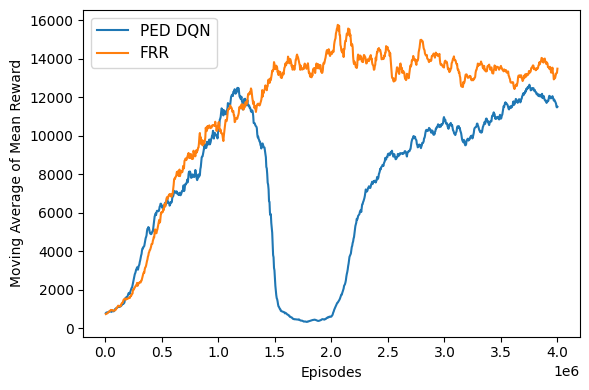

In [255]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

#Reputation filtering parameter = 2
log_file_6000 = '/home/aim-pfe/Documents/FRR/priority-intrinsic-/results/logs/default_folder/r-sc-battery_endless-h-1-m-12x12-Pp-20x19-a-ped_dqn-tu-5000-mq-4-rb-20000-mb-32-lr-0.0001-seed-1-0902015358.txt'
#Reputation filtering parameter = 4

log_file_7000 = '/home/aim-pfe/Documents/PED333/PED33/results/logs/default_folder/r-sc-battery_endless-h-1-m-12x12-Pp-20x19-a-ped_dqn-tu-5000-mq-4-rb-20000-mb-32-lr-0.0001-seed-1-0621234216.txt'
#Reputation filtering parameter = 6

log_file_5000 = '/home/aim-pfe/Documents/FRR/priority-intrinsic-/results/logs/default_folder/r-sc-battery_endless-h-1-m-14x14-Pp-18x17-a-ped_dqn-tu-5000-mq-4-rb-20000-mb-32-lr-0.0001-seed-1-0911173652.txt'


#Reputation filtering parameter = 8
log_file_55000 = '/home/aim-pfe/Documents/FRR/priority-intrinsic-/results/logs/default_folder/r-sc-battery_endless-h-1-m-12x12-Pp-20x19-a-ped_dqn-tu-5000-mq-4-rb-20000-mb-32-lr-0.0001-seed-1-0904110623.txt'


#Reputation filtering parameter = 10
log_file_77000 = '/home/aim-pfe/Documents/PED33/results/logs/default_folder/r-sc-battery_endless-h-1-m-14x14-Pp-18x17-a-ped_dqn-tu-5000-mq-4-rb-20000-mb-32-lr-0.0001-seed-1-0911173714.txt'


# Function to parse log files
def parse_log_file(file_path):
    episodes = []
    rewards = []
    preys_captured = []
    td_errors = []
    RX = []

    with open(file_path, 'r') as file:
        for line in file:
            parts = line.strip().split('\t')
            if len(parts) >= 4:
                if parts[2] == 'steps':
                    episodes.append(int(parts[1]))
                elif parts[2] == 'b_rwd':
                    reward_values = list(map(float, parts[3:]))
                    rewards.append(np.mean(reward_values))  # Compute mean reward
                elif parts[2] == 'captr':
                    preys_values = list(map(float, parts[3:]))
                    preys_captured.append(np.mean(preys_values))  # Compute mean preys captured
                elif parts[2] == 'td_er':
                    td_error_values = list(map(float, parts[3:]))
                    td_errors.append(np.mean(td_error_values))  # Compute mean TD error
                elif parts[2] == 'RX':
                    rx_list = list(map(float, parts[3:]))
                    RX.append(np.mean(rx_list))  # Compute mean RX

    return episodes, rewards, preys_captured, td_errors, RX


# Function to compute moving average
from scipy.ndimage import uniform_filter1d

def moving_average(data, window_size=10):
    return uniform_filter1d(data, size=window_size)

episodes_5000, rewards_5000, preys_5000, td_errors_5000, RX_5000 = parse_log_file(log_file_5000)
episodes_6000, rewards_6000, preys_6000, td_errors_6000, RX_6000 = parse_log_file(log_file_6000)
episodes_7000, rewards_7000, preys_7000, td_errors_7000, RX_6000 = parse_log_file(log_file_7000)
episodes_55000, rewards_55000, preys_55000, td_errors_55000, RX_55000 = parse_log_file(log_file_55000)
episodes_77000, rewards_77000, preys_77000, td_errors_77000, RX_6000 = parse_log_file(log_file_77000)

moving_avg_rewards_5000 = moving_average(rewards_5000)
moving_avg_rewards_6000 = moving_average(rewards_6000)
moving_avg_rewards_7000 = moving_average(rewards_7000)
moving_avg_rewards_55000 = moving_average(rewards_55000)
moving_avg_rewards_77000 = moving_average(rewards_77000)


# Ensure TensorFlow uses the correct device
device = "GPU" if tf.config.list_physical_devices('GPU') else "CPU"
print("TensorFlow device:", device)

# Plot the rewards with real fluctuations in faded colors
plt.figure(facecolor='white', figsize=(6, 5))
'''
plt.plot(episodes_7000, rewards_7000, color='blue', alpha=0.3)
plt.plot(episodes_77000, rewards_77000, color='red', alpha=0.3)
plt.plot(episodes_5000, rewards_5000,   color='green',alpha=0.3)
plt.plot(episodes_6000, rewards_6000, color='orange', alpha=0.3)
plt.plot(episodes_55000, rewards_55000,   color='purple',alpha=0.3)'''
# Function to limit the episodes and corresponding data to 3 million time steps
def limit_time_steps(episodes, data, max_steps=4000000):
    limited_episodes = []
    limited_data = []
    for ep, d in zip(episodes, data):
        if ep <= max_steps:
            limited_episodes.append(ep)
            limited_data.append(d)
        else:
            break
    return limited_episodes, limited_data

# Apply the limit to each set of episodes and moving averages
limited_episodes_6000, limited_rewards_6000 = limit_time_steps(episodes_6000, moving_avg_rewards_6000)
limited_episodes_7000, limited_rewards_7000 = limit_time_steps(episodes_7000, moving_avg_rewards_7000)
limited_episodes_5000, limited_rewards_5000 = limit_time_steps(episodes_5000, moving_avg_rewards_5000)
limited_episodes_55000, limited_rewards_55000 = limit_time_steps(episodes_55000, moving_avg_rewards_55000)
limited_episodes_77000, limited_rewards_77000 = limit_time_steps(episodes_77000, moving_avg_rewards_77000)

# Plot the rewards with the 3 million time steps limit
plt.figure(facecolor='white', figsize=(6, 4))
plt.plot(limited_episodes_77000, limited_rewards_77000, label='PED DQN')


plt.plot(limited_episodes_5000, limited_rewards_5000, label='FRR')
plt.xlabel('Episodes')
plt.ylabel('Moving Average of Mean Reward')

plt.legend(loc='best', fontsize=11)
plt.grid(False)
plt.tight_layout()

plt.show()

TensorFlow device: CPU


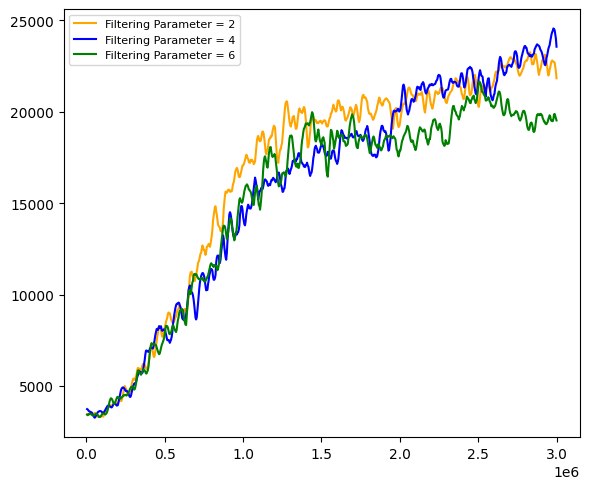

In [47]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from scipy.ndimage import uniform_filter1d

# Define log files with different reputation filtering parameters
log_files = {
    2: '/home/aim-pfe/Documents/FRR/priority-intrinsic-/results/logs/default_folder/r-sc-battery_endless-h-1-m-12x12-Pp-20x19-a-ped_dqn-tu-5000-mq-4-rb-20000-mb-32-lr-0.0001-seed-1-0902015358.txt',
    4: '/home/aim-pfe/Documents/PED333/PED33/results/logs/default_folder/r-sc-battery_endless-h-1-m-12x12-Pp-20x19-a-ped_dqn-tu-5000-mq-4-rb-20000-mb-32-lr-0.0001-seed-1-0621234216.txt',
    6: '/home/aim-pfe/Documents/FRR/FRR2/priority-intrinsic-/results/logs/default_folder/r-sc-battery_endless-h-1-m-12x12-Pp-20x19-a-ped_dqn-tu-5000-mq-4-rb-20000-mb-32-lr-0.0001-seed-1-0902021337.txt'
}

# Function to parse log files
def parse_log_file(file_path):
    episodes, rewards, preys_captured, td_errors, RX = [], [], [], [], []
    
    with open(file_path, 'r') as file:
        for line in file:
            parts = line.strip().split('\t')
            if len(parts) >= 4:
                if parts[2] == 'steps':
                    episodes.append(int(parts[1]))
                elif parts[2] == 'b_rwd':
                    rewards.append(np.mean(list(map(float, parts[3:]))))
                elif parts[2] == 'captr':
                    preys_captured.append(np.mean(list(map(float, parts[3:]))))
                elif parts[2] == 'td_er':
                    td_errors.append(np.mean(list(map(float, parts[3:]))))
                elif parts[2] == 'RX':
                    RX.append(np.mean(list(map(float, parts[3:]))))
                    
    return episodes, rewards, preys_captured, td_errors, RX

# Function to compute moving average (simple smoothing)
def moving_average(data, window_size=5):
    return uniform_filter1d(data, size=window_size)

# Parse all log files
parsed_logs = {param: parse_log_file(log_files[param]) for param in log_files}

# Compute moving averages
window_size = 5  # First pass window size
smoothed_rewards = {param: moving_average(parsed_logs[param][1], window_size) for param in parsed_logs}

# Apply a second round of smoothing (double moving average)
double_smoothed_rewards = {param: moving_average(smoothed_rewards[param], window_size) for param in parsed_logs}

# Function to limit episodes and data to a maximum number of time steps
def limit_time_steps(episodes, data, max_steps=3000000):
    limited_episodes, limited_data = [], []
    for ep, d in zip(episodes, data):
        if ep <= max_steps:
            limited_episodes.append(ep)
            limited_data.append(d)
        else:
            break
    return limited_episodes, limited_data

# Apply the limit to each set of episodes and double-smoothed rewards
limited_smoothed_rewards = {param: limit_time_steps(parsed_logs[param][0], double_smoothed_rewards[param]) for param in parsed_logs}

# Ensure TensorFlow uses the correct device
device = "GPU" if tf.config.list_physical_devices('GPU') else "CPU"
print("TensorFlow device:", device)

# Plot the double-smoothed rewards with a 3 million time step limit
plt.figure(facecolor='white', figsize=(6, 5))

colors = {2: 'orange', 4: 'blue', 6: 'green'}
for param in limited_smoothed_rewards:
    episodes, rewards = limited_smoothed_rewards[param]
    plt.plot(episodes, rewards, label=f'Filtering Parameter = {param}', color=colors[param])

plt.legend(loc='best', fontsize=8)
plt.grid(False)
plt.tight_layout()
plt.show()


TensorFlow device: CPU


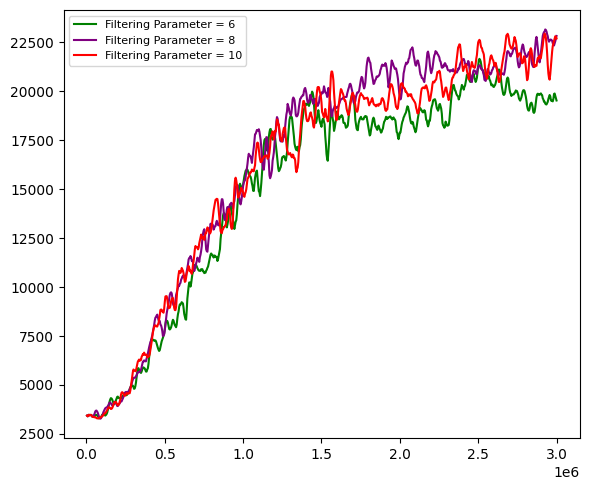

In [46]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from scipy.ndimage import uniform_filter1d

# Define log files with different reputation filtering parameters
log_files = {
    6: '/home/aim-pfe/Documents/FRR/FRR2/priority-intrinsic-/results/logs/default_folder/r-sc-battery_endless-h-1-m-12x12-Pp-20x19-a-ped_dqn-tu-5000-mq-4-rb-20000-mb-32-lr-0.0001-seed-1-0902021337.txt',
    8: '/home/aim-pfe/Documents/FRR/priority-intrinsic-/results/logs/default_folder/r-sc-battery_endless-h-1-m-12x12-Pp-20x19-a-ped_dqn-tu-5000-mq-4-rb-20000-mb-32-lr-0.0001-seed-1-0904110623.txt',
    10: '/home/aim-pfe/Documents/FRR/FRR2/priority-intrinsic-/results/logs/default_folder/r-sc-battery_endless-h-1-m-12x12-Pp-20x19-a-ped_dqn-tu-5000-mq-4-rb-20000-mb-32-lr-0.0001-seed-1-0904110325.txt'
}

# Function to parse log files
def parse_log_file(file_path):
    episodes, rewards, preys_captured, td_errors, RX = [], [], [], [], []
    
    with open(file_path, 'r') as file:
        for line in file:
            parts = line.strip().split('\t')
            if len(parts) >= 4:
                if parts[2] == 'steps':
                    episodes.append(int(parts[1]))
                elif parts[2] == 'b_rwd':
                    rewards.append(np.mean(list(map(float, parts[3:]))))
                elif parts[2] == 'captr':
                    preys_captured.append(np.mean(list(map(float, parts[3:]))))
                elif parts[2] == 'td_er':
                    td_errors.append(np.mean(list(map(float, parts[3:]))))
                elif parts[2] == 'RX':
                    RX.append(np.mean(list(map(float, parts[3:]))))
                    
    return episodes, rewards, preys_captured, td_errors, RX

# Function to compute moving average (simple smoothing)
def moving_average(data, window_size=5):
    return uniform_filter1d(data, size=window_size)

# Parse all log files
parsed_logs = {param: parse_log_file(log_files[param]) for param in log_files}

# Compute moving averages
window_size = 5  # First pass window size
smoothed_rewards = {param: moving_average(parsed_logs[param][1], window_size) for param in parsed_logs}

# Apply a second round of smoothing (double moving average)
double_smoothed_rewards = {param: moving_average(smoothed_rewards[param], window_size) for param in parsed_logs}

# Function to limit episodes and data to a maximum number of time steps
def limit_time_steps(episodes, data, max_steps=3000000):
    limited_episodes, limited_data = [], []
    for ep, d in zip(episodes, data):
        if ep <= max_steps:
            limited_episodes.append(ep)
            limited_data.append(d)
        else:
            break
    return limited_episodes, limited_data

# Apply the limit to each set of episodes and double-smoothed rewards
limited_smoothed_rewards = {param: limit_time_steps(parsed_logs[param][0], double_smoothed_rewards[param]) for param in parsed_logs}

# Ensure TensorFlow uses the correct device
device = "GPU" if tf.config.list_physical_devices('GPU') else "CPU"
print("TensorFlow device:", device)

# Plot the double-smoothed rewards with a 3 million time step limit
plt.figure(facecolor='white', figsize=(6, 5))

colors = {6: 'green', 8: 'purple', 10: 'red'}
for param in limited_smoothed_rewards:
    episodes, rewards = limited_smoothed_rewards[param]
    plt.plot(episodes, rewards, label=f'Filtering Parameter = {param}', color=colors[param])

plt.legend(loc='best', fontsize=8)
plt.grid(False)
plt.tight_layout()
plt.show()

In [ ]:
#FRR in grid 12*12 with 18 predators 17 preys for stability 
#sc-battery_endless-h-1-m-12x12-Pp-18x17-a-ped_dqn-tu-5000-mq-4-rb-20000-mb-32-lr-0.0001-seed-1-0906150932

TensorFlow device: CPU


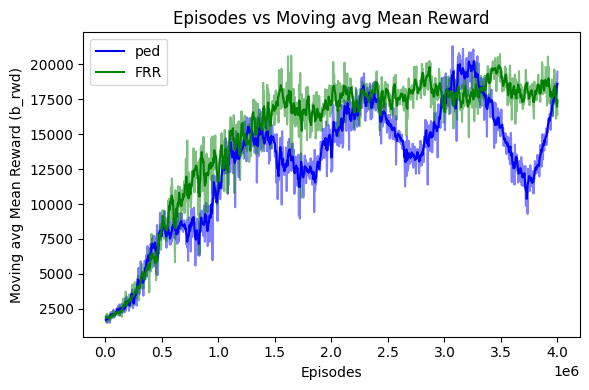

In [276]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

 
log_file_5000 = '/home/aim-pfe/Documents/FRR/priority-intrinsic-/results/logs/default_folder/r-sc-battery_endless-h-1-m-12x12-Pp-18x17-a-ped_dqn-tu-5000-mq-4-rb-20000-mb-32-lr-0.0001-seed-1-0901173143.txt'

#sc-battery_endless-h-1-m-12x12-Pp-18x17-a-ped_dqn-tu-5000-mq-4-rb-20000-mb-32-lr-0.0001-seed-1-0906150932
log_file_6000 = '/home/aim-pfe/Documents/FRR/priority-intrinsic-/results/logs/default_folder/r-sc-battery_endless-h-1-m-12x12-Pp-18x17-a-ped_dqn-tu-5000-mq-4-rb-20000-mb-32-lr-0.0001-seed-1-0906150932.txt'

#sc-battery_endless-h-1-m-12x12-Pp-18x17-a-ped_dqn-tu-5000-mq-4-rb-20000-mb-32-lr-0.0001-seed-1-0902162758.txt'




# seed = 2 ped dqn       sc-battery_endless-h-1-m-12x12-Pp-18x17-a-ped_dqn-tu-5000-mq-4-rb-20000-mb-32-lr-0.0001-seed-2-0918134202

#seed = 2 FRR            sc-battery_endless-h-1-m-12x12-Pp-18x17-a-ped_dqn-tu-5000-mq-4-rb-20000-mb-32-lr-0.0001-seed-2-0918134424

# seed = 3 ped dqn      sc-battery_endless-h-1-m-12x12-Pp-18x17-a-ped_dqn-tu-5000-mq-4-rb-20000-mb-32-lr-0.0001-seed-3-0919205745

# seed = 4 ped dqn      sc-battery_endless-h-1-m-12x12-Pp-18x17-a-ped_dqn-tu-5000-mq-4-rb-20000-mb-32-lr-0.0001-seed-4-0921123046


#seed = 3 FRR            sc-battery_endless-h-1-m-12x12-Pp-18x17-a-ped_dqn-tu-5000-mq-4-rb-20000-mb-32-lr-0.0001-seed-3-0919205719


#seed = 4 FRR            sc-battery_endless-h-1-m-12x12-Pp-18x17-a-ped_dqn-tu-5000-mq-4-rb-20000-mb-32-lr-0.0001-seed-4-0921123028




def parse_log_file(file_path):
    episodes = []
    rewards = []
    preys_captured = []
    td_errors = []
    RX = []

    with open(file_path, 'r') as file:
        for line in file:
            parts = line.strip().split('\t')
            if len(parts) >= 4:
                if parts[2] == 'steps':
                    episodes.append(int(parts[1]))
                elif parts[2] == 'b_rwd':
                    reward_values = list(map(float, parts[3:]))
                    rewards.append(np.mean(reward_values))  # Compute mean reward
                elif parts[2] == 'captr':
                    preys_values = list(map(float, parts[3:]))
                    preys_captured.append(np.mean(preys_values))  # Compute mean preys captured
                elif parts[2] == 'td_er':
                    td_error_values = list(map(float, parts[3:]))
                    td_errors.append(np.mean(td_error_values))  # Compute mean TD error
                elif parts[2] == 'RX':
                    rx_list = list(map(float, parts[3:]))
                    RX.append(np.mean(rx_list))  # Compute mean TD error

    return episodes, rewards, preys_captured, td_errors, RX

from scipy.ndimage import uniform_filter1d

def moving_average(data, window_size=5):
    return uniform_filter1d(data, size=window_size)

episodes_5000, rewards_5000, preys_5000, td_errors_5000, RX_5000 = parse_log_file(log_file_5000)
episodes_6000, rewards_6000, preys_6000, td_errors_6000, RX_6000 = parse_log_file(log_file_6000)

moving_avg_rewards_5000 = moving_average(rewards_5000)
moving_avg_rewards_6000 = moving_average(rewards_6000)

moving_avg_preys_5000 = moving_average(preys_5000)
moving_avg_preys_6000 = moving_average(preys_6000)

moving_avg_td_errors_5000 = moving_average(td_errors_5000)
moving_avg_td_errors_6000 = moving_average(td_errors_6000)


# Ensure TensorFlow uses the correct device
device = "GPU" if tf.config.list_physical_devices('GPU') else "CPU"
print("TensorFlow device:", device)

# Plot the rewards, preys captured, and TD errors from all files
plt.figure(facecolor='white', figsize=(6, 4))

plt.plot(episodes_5000, rewards_5000, color='blue', alpha=0.5)
plt.plot(episodes_6000, rewards_6000, color='green', alpha=0.5)

plt.plot(episodes_5000, moving_avg_rewards_5000, label='ped', color='blue')
plt.plot(episodes_6000, moving_avg_rewards_6000, label='FRR', color='green')

plt.xlabel('Episodes')
plt.ylabel('Moving avg Mean Reward (b_rwd)')
plt.title('Episodes vs Moving avg Mean Reward')
plt.legend()
plt.grid(False)

plt.tight_layout()
plt.show()

In [ ]:
'''*** 12 12 23 22:
** ped dqn: 
* seed 2        sc-battery_endless-h-1-m-12x12-Pp-23x22-a-ped_dqn-tu-5000-mq-4-rb-20000-mb-32-lr-0.0001-seed-2-0922174335
* seed 3                  sc-battery_endless-h-1-m-12x12-Pp-23x22-a-ped_dqn-tu-5000-mq-4-rb-20000-mb-32-lr-0.0001-seed-3-0924012038
* seed 4                                  sc-battery_endless-h-1-m-12x12-Pp-23x22-a-ped_dqn-tu-5000-mq-4-rb-20000-mb-32-lr-0.0001-seed-4-0925171638
** FRR=4:
* seed 2        sc-battery_endless-h-1-m-12x12-Pp-23x22-a-ped_dqn-tu-5000-mq-4-rb-20000-mb-32-lr-0.0001-seed-2-0922174442                      
* seed 3                   sc-battery_endless-h-1-m-12x12-Pp-23x22-a-ped_dqn-tu-5000-mq-4-rb-20000-mb-32-lr-0.0001-seed-3-0924012021
* seed 4                      sc-battery_endless-h-1-m-12x12-Pp-23x22-a-ped_dqn-tu-5000-mq-4-rb-20000-mb-32-lr-0.0001-seed-4-0925171657
** FRR=7:
* seed 2                sc-battery_endless-h-1-m-12x12-Pp-23x22-a-ped_dqn-tu-5000-mq-4-rb-20000-mb-32-lr-0.0001-seed-2-0927125852           
* seed 3                 sc-battery_endless-h-1-m-12x12-Pp-23x22-a-ped_dqn-tu-5000-mq-4-rb-20000-mb-32-lr-0.0001-seed-3-0927130752
* seed 4                sc-battery_endless-h-1-m-12x12-Pp-23x22-a-ped_dqn-tu-5000-mq-4-rb-20000-mb-32-lr-0.0001-seed-4-0930121443
** partial qmix: 
* seed 1
* seed 2
* seed 3
* seed 4'''

In [ ]:
mechanism M0 
sc-battery_endless-h-1-m-12x12-Pp-20x19-a-ped_dqn-tu-5000-mq-4-rb-20000-mb-32-lr-0.0001-seed-1-0908122531